In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import neurd

/usr/local/lib/python3.8/dist-packages/python_jsonschema_objects/__init__.py:113: UserWarning: Schema id not specified. Defaulting to 'self'
  warnings.warn("Schema id not specified. Defaulting to 'self'")


In [3]:
from mesh_tools import trimesh_utils as tu
from datasci_tools import ipyvolume_utils as ipvu
from neurd import neuron_visualizations as nviz
from pathlib import Path

In [4]:
segment_id = 864691134917511946

# Load the appropriate volume data inferface object

In [5]:
from neurd.vdi_microns import volume_data_interface as vdi
vdi.set_parameters_for_directory_modules()

In [6]:
synapse_filepath = str(Path(f'./{segment_id}_synapses.csv').absolute())
synapse_filepath

'/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/864691134917511946_synapses.csv'

In [7]:
from datasci_tools import pandas_utils as pu
df = pu.csv_to_df(synapse_filepath)
df

,segment_id,segment_id_secondary,synapse_id,prepost,synapse_x,synapse_y,synapse_z,synapse_size
0,864691134917511946,864691131890533202,74184144,postsyn,130294,142230,26219,440
1,864691134917511946,864691131971669827,75022036,postsyn,129722,172364,24745,8428
2,864691134917511946,864691132108273063,70508178,postsyn,129296,134025,26165,26588
3,864691134917511946,864691132292869029,104897939,postsyn,145174,190248,26715,4500
4,864691134917511946,864691132404296761,67503404,postsyn,126052,183560,25913,2396
...,...,...,...,...,...,...,...,...
2310,864691134917511946,864691137019576686,92314268,postsyn,136376,184538,26155,5916
2311,864691134917511946,864691137196931393,78527771,postsyn,130688,192222,24419,15896
2312,864691134917511946,864691137196956737,105192008,postsyn,143492,188714,25058,7820
2313,864691134917511946,864691137196956737,113437532,postsyn,147378,190346,25751,708


In [8]:
vdi.set_synapse_filepath(
    synapse_filepath
)

# Data Prep: Loading mesh

In [9]:
mesh = vdi.fetch_segment_id_mesh(
    segment_id,
    plot = True
)
mesh

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(420741, 3), faces.shape=(865980, 3), name=`864691134917511946.off`)>

In [10]:
from datasci_tools import pipeline

products = pipeline.PipelineProducts()
products

# Step 1: Decimation

In [11]:
"""
NOTE: an already decimated mesh is used for the example
in order to speed up time, that's why the mesh_dec
object will be overwritten with original mesh object
"""

"\nNOTE: an already decimated mesh is used for the example\nin order to speed up time, that's why the mesh_dec\nobject will be overwritten with original mesh object\n"

In [12]:
decimation_parameters = dict(
    decimation_ratio =0.25,
)

In [13]:
import time

st = time.time()
mesh_decimated = tu.decimate(
    mesh,
    **decimation_parameters
)

print(f"Total time = {time.time() - st}")

xvfb-run -n 6097 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_13529.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_13529_decimated.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/decimation_meshlab_25303879.mls
Total time = 25.227389812469482


In [14]:
# saving any parameters used or output products for later use
products.set_stage_attrs(
    stage = "decimation",
    attr_dict = dict(
        decimation_parameters = decimation_parameters,
        segment_id = segment_id,
    ),
    
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
}



# Step 2: Soma Identification

In [15]:
from neurd import soma_extraction_utils as sm
soma_extraction_parameters = dict()

In [16]:
# could inspect the parameters of a certain category
from neurd import parameter_utils as paru
paru.category_param_from_module(
        module = sm,
        category = "glia",
)

{'glia_volume_threshold_in_um_global': 2500,
 'glia_n_faces_threshold_global': 400000,
 'glia_n_faces_min_global': 100000}

In [17]:
# overwritting decimated mesh because original was already decimated
mesh_decimated = mesh

In [18]:
from neurd import neuron_visualizations as nviz

verbose = True

soma_products = sm.soma_indentification(
    mesh_decimated,
    verbose=verbose,
    **soma_extraction_parameters
)

Current Arguments Using (adjusted for decimation):
 large_mesh_threshold= 5000.0 
large_mesh_threshold_inner = 3250.0 
soma_size_threshold = 562.5 
soma_size_threshold_max = 75000.0
outer_decimation_ratio = 0.25
inner_decimation_ratio = 0.25
max_mesh_sized_filtered_away = 22500.0
xvfb-run -n 8500 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_73425.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_73425_remove_interior.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_552970.mls
removed temporary input file: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_73425.off
removed temporary output file: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_73425_remove_interior.off
/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_552970.mls is being

  0%|          | 0/13 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.779125]
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 1537 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_125632.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_125632_poisson.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_64744.mls
removed temporary input file: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_125632.off
removed temporary output file: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_125632_poisson.off
mesh.is_watertight = True
/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_64744.mls is being deleted....
Inside sphere validater: ratio_val = 3.4043175212335024
----- working on mesh after poisson #1: <trim

  0%|          | 0/1 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.5418655]
mesh.is_watertight = True
/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_626191.mls is being deleted....
Inside sphere validater: ratio_val = 769.5128726957494
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(767, 3), faces.shape=(1534, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/230_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_970606.mls is being deleted....
Inside sphere validater: ratio_val = 769.5128726957494
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(767, 3), faces.shape=(1534, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #2: <trimesh.Trimesh(vertices.shape=(2914, 3), faces.shape=(5824, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 9898 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.of

  0%|          | 0/6 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.45577199999999995]
mesh.is_watertight = True
/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_365313.mls is being deleted....
Inside sphere validater: ratio_val = 318.4759330340049
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(524, 3), faces.shape=(1040, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0019230769230769232
Going to run cgal segmentation with:
File: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/802_mesh 
clusters:3 
smoothness:0.2

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

mesh.is_watertight = True
/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_428238.mls is being deleted....
Inside sphere validater: ratio_val = 318.4759330340049
--->This soma mesh was not added because failed retry of sphere validation:
 soma_mesh = <trimesh.Trimesh(vertices.shape=(524, 3), faces.shape=(1040, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>, curr_side_len_check = True, curr_volume_check = False
----- working on mesh after poisson #3: <trimesh.Trimesh(vertices.shape=(2561, 3), faces.shape=(5122, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 7516 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.of

  0%|          | 0/7 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(210, 3), faces.shape=(418, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(210, 3), faces.shape=(418, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(252, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(127, 3), faces.shape=(252, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #4: <trimesh.Trimesh(vertices.shape=(2505, 3), faces.shape=(5006, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 369 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25976839.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(627, 3), faces.shape=(1250, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_m

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.45000850000000003]
mesh.is_watertight = True
/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_624595.mls is being deleted....
Inside sphere validater: ratio_val = 44.002011369429006
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(294, 3), faces.shape=(582, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0
Going to run cgal segmentation with:
File: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/734_mesh 
clusters:3 
smoothness:0.2

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

Could not find valid soma mesh in retry
----- working on mesh after poisson #5: <trimesh.Trimesh(vertices.shape=(2190, 3), faces.shape=(4376, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 9434 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25976839.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(549, 3), faces.shape=(1094, 3), name=`neuron_12345_decimated_largest_piece_poisson_

  0%|          | 0/5 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(230, 3), faces.shape=(454, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(230, 3), faces.shape=(454, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(108, 3), faces.shape=(207, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(108, 3), faces.shape=(207, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]

----- working on mesh after poisson #6: <trimesh.Trimesh(vertices.shape=(2089, 3), faces.shape=(4174, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 4942 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25976839.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(523, 3), faces.shape=(1042, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_

  0%|          | 0/3 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(265, 3), faces.shape=(523, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(265, 3), faces.shape=(523, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 2



  0%|          | 0/2 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(174, 3), faces.shape=(340, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(174, 3), faces.shape=(340, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #7: <trimesh.Trimesh(vertices.shape=(2076, 3), faces.shape=(4148, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 6760 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25976839.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(520, 3), faces.shape=(1036, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_

  0%|          | 0/5 [00:00<?, ?it/s]


    --- On segmentation loop 1 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]


    --- On segmentation loop 2 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(198, 3), faces.shape=(389, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 1



  0%|          | 0/1 [00:00<?, ?it/s]

----- working on mesh after poisson #8: <trimesh.Trimesh(vertices.shape=(1712, 3), faces.shape=(3420, 3), name=`neuron_12345_decimated_largest_piece_poisson.off`)>
xvfb-run -n 8275 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/12345/decimation_meshlab_25976839.mls

-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(429, 3), faces.shape=(854, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_m

  0%|          | 0/3 [00:00<?, ?it/s]

      ------ Found 1 viable somas: [0.548969]
mesh.is_watertight = True
/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_299484.mls is being deleted....
Inside sphere validater: ratio_val = 264.5780977148202
->Attempting retry of soma because failed first checks: soma_mesh = <trimesh.Trimesh(vertices.shape=(309, 3), faces.shape=(612, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>, curr_side_len_check = True, curr_volume_check = False
perc_0_faces = 0.0032679738562091504
Going to run cgal segmentation with:
File: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/460_mesh 
clusters:3 
smoothness:0.2

Number of segments: 3



  0%|          | 0/3 [00:00<?, ?it/s]

Could not find valid soma mesh in retry



 Total time for run = 135.06593441963196
Before Filtering the number of somas found = 1

---Performing Soma Mesh Backtracking to original mesh for poisson soma 0
backtrack_soma_size_threshold = 8000
xvfb-run -n 9180 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_91136.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_91136_fill_holes.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/fill_holes_711688.mls

---- meshlab output -----
QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Current Plugins Dir is: /meshlab/src/distrib/plugins 
Error While parsing the XML filter plugin descriptors: We are trying to load a xml file that does not correspond to any dll or javascript code; please delete all the spurious xml files
Error While parsing the XML filter plugin descriptors: We are tryin

  0%|          | 0/19 [00:00<?, ?it/s]

Largest hole before segmentation = 195442.17366895775, after = 578941.165186773,

ratio = 2.9622120667128398, difference = 383498.9915178153
filtered_soma_list_components = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
Not need to do a second pass because already found a soma



-------Splits after inner decimation len = 1--------

done exporting decimated mesh: neuron_12345_decimated_largest_piece_poisson_largest_inner.off

    --- On segmentation loop 0 --
largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(429, 3), faces.shape=(854, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>

largest_mesh_path_inner_decimated_clean = <trimesh.Trimesh(vertices.shape=(429, 3), faces.shape=(854, 3), name=`neuron_12345_decimated_largest_piece_poisson_largest_inner_decimated.off`)>
soma_size_threshold = 562.5
soma_size_threshold_max = 75000.0
soma_width_threshold = 0.32

Number of segments: 3

      ------ Found 1 viable somas: [0.548969]
mesh.is_watertight = True
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_221866.mls is being deleted....
Inside sphere validater: ratio_val = 264.5780977148202
->Attempting retry of soma because failed first checks: soma_mes

xvfb-run -n 8875 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_12305.off -o /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_12305_fill_holes.off -s /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/fill_holes_342455.mls
removed temporary input file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_12305.off
removed temporary output file: /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_12305_fill_holes.off
/neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/fill_holes_342455.mls is being deleted....
xvfb-run -n 1623 -s "-screen 0 800x600x24" meshlabserver $@  -i /neurd_packages/NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_242.off -o /neurd_packages/NEURD/Applicat

In [19]:
sm.plot_soma_products(
    mesh_decimated,
    soma_products = soma_products,
    verbose = True
)

# of somas = 1
# of glia = 0
# of nuclei = 15


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [20]:
soma_products.soma_extraction_parameters = soma_extraction_parameters
soma_products

In [21]:
products.set_stage_attrs(
    stage = "soma_identification",
    attr_dict = soma_products,
)

print(products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Step 2b: Saving off pipeline products

In [22]:
from datasci_tools import system_utils as su
su.save_object(
    products,"products_up_to_soma_stage"
)

Saved object at /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/products_up_to_soma_stage.pkl
File size is 23.116565 MB
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:139649735975888
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:139649742006304
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:139649742041968
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:139649742044800
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:139649742146000
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:139649742120224
Cleared mesh: <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>:139649742065776
Cleared mesh: <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>:139649742068608
Cleared mesh: <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>:1396497421

# Step 3: Decomposition

In [23]:
import networkx as nx
nx.__version__

'2.8.8'

In [24]:
from neurd import neuron

neuron_obj = neuron.Neuron(
    mesh = mesh,
    segment_id = segment_id, # don't need this explicitely if segment_id is already in products
    pipeline_products = products,
    suppress_preprocessing_print=False,
    suppress_output=False,
)

neuron_obj

--- 0) Having to preprocess the Neuron becuase no preprocessed data
Please wait this could take a while.....
Skipping the hole filling
limb_remove_mesh_interior_face_threshold = 0
use_meshafterparty = True
Using pre-computed somas: soma_mesh_list = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
Soma List = [<trimesh.Trimesh(vertices.shape=(19848, 3), faces.shape=(39717, 3))>]
soma_mesh_list_centers = [array([ 553544.98545949,  749839.54254837, 1047338.92563482])]
Getting Glia and Nuclei Pieces Subtracted Away 0.29046034812927246
 Splitting mesh after soma cancellation 1.763852834701538
# of split_meshes = 4
 Containing Mesh Indices 0.03356671333312988
containing_mesh_indices = {0: 0}
 non_soma_touching_meshes 2.5987625122070312e-05
There were 3 pieces found after size threshold
 Finding inside pieces and non_soma_touching meshes 0.4912903308868408
soma_containing_meshes = {0: [0]}

-----Before combining multiple mesh pieces-----
soma_containing_meshes = {0: [0]}

  0%|                                                                                                                                                                                                                                                                                                                                               | 0/1 [00:00<?, ?it/s]

  0%|          | 0/197064 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.59s/it]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 2.8452601432800293
connecting at the root
branches_touching_root = [26]
combining close nodes
combine_threshold = 700
length of Graph = 16119
After combining close endpoints max(kept_branches_idx) = 26, len(kept_branches_idx) = 26
empty_indices % = 0.0
 conflict_indices % = 0.0037420005192980313


  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Decomposing first pass: 14.766220569610596
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [69444, 13204, 560, 4349, 39119, 7599, 8194, 5661, 4870, 10066, 6635, 14715, 6181]
mesh_large_connectivity: 0.4391782283782959
Finding MAP candidates connected components: 0.0001246929168701172
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.24862408638000488
Grouping MP Sublimbs by Graph: 0.10209965705871582
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.010398149490356445
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 3491 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisso

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.09739160537719727
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 61.52311563491821
Checking connected components after removing cycles
Total time for mesh KDTree = 0.8086128234863281
sbv[0].reshape(-1,3) = [[ 550001.9  743270.1 1043789. ]]
closest_sk_pt_coord BEFORE = [ 549714.  742862. 1045330.]
current_skeleton.shape = (4742, 2, 3)
node_for_stitch = 4531: [ 549714.  742862. 1045330.]
node_for_stitch AFTER = 4531: [ 549714.  742862. 1045330.]
possible_node_loc = [  30  319  365  414  529  934  995 1167 1206 1442 1566 1587 1657 1717
 1741 1831 2055 2292 2553 2577 2628 2782 2789 2794 2868 2895 3114 3132
 3142 3172 3251 3258 3425 3448 3496 4191 4205 4217 4467 4520 4531 4675
 4708 4741]
possible_node_loc AFTER = [  30  319  365  414  529  934  995 1167 1206 1442 1566 1587 1657 1717
 1741 1831 2055 2292 2553 2577 2628 2782 2789 279

  0%|          | 0/37 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (4575, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 2 valid paths to replace
valid_paths = [array([1459., 1473., 1492.]), array([3983., 3997.])]
valid_path_lengths = [376.9745998293499, 375.26657191921583]
length of Graph = 4575
Working on path [1459. 1473. 1492.]
path_degrees = [3, 2, 3]
Working on path [3983. 3997.]
path_degrees = [3, 3]
node_degrees = [2 4 2 2 2 2 2]
skeletonize_and_clean_connected_branch_CGAL: 74.0868022441864
Working on limb correspondence for #0 MAP piece
xvfb-run -n 5425 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_96653.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_96653_remove_interior.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_602544.ml

0it [00:00, ?it/s]

Total time for decomposition = 28.669732809066772
mesh_correspondence_first_pass: 28.669934034347534
Limb decomposed into 10 branches
divided_skeleton_graph_recovered = (4565, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (4565, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (9, 10)
empty_indices % = 0.27148381139262423
 conflict_indices % = 0.015598356742236237


  0%|          | 0/415 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 127.93181228637695
correspondence_1_to_1: 25.164673805236816
Total time for MAP sublimb processing 127.93193578720093
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.003870248794555664
Do Not Need to Fix MP Decomposition 0 so just continuing
---- Working on MP Decomposition #1 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.003776073455810547
Do Not Need to Fix MP Decomposition 1 so just continuing
---- Working on MP Decomposition #2 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.001857757568359375
Do Not Need to Fix MP Decomposition 2 so just continuing
---- Working on MP Decomposition #3 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0015270709991455078
Do Not Need to Fix MP Decomposition 3 so just continuing
---- Working on MP Decomposition 

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.17635466659516852
 conflict_indices % = 0.002265597769257581


  0%|          | 0/173 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (3, 4)
empty_indices % = 0.19311175475323333
 conflict_indices % = 0.008813436188619005


  0%|          | 0/71 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0, 3]
MP_branches_for_correspondence = [0 3]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 




---- Working on (1, 0) connection-----
sk_conn = [0, 1]
conn = [0, 1]
winning_vertex = [ 563290.32537776  726396.29725494 1040712.26167108]
MP_branches_with_stitch_point = [0, 1]
MAP_branches_with_stitch_point = [7]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.35889378904814406
 conflict_indices % = 0.008324145534729878


  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 1]
MP_branches_for_correspondence = [0 1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (1, 0) 




---- Working on (2, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 528048.23493116  738378.68018906 1076921.83034921]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [2]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.26981786643538597
 conflict_indices % = 0.008846487424111016


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2831312098188194
 conflict_indices % = 0.01581677381648159


  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (2, 0) 




---- Working on (3, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 544165.4049786   721897.99254932 1044831.71286521]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [6, 7, 10]
MAP_stitch_point_on_end_or_branch = True

Revising the MAP pieces index:
MAP_pieces_idx_touching_border = [6, 7], MAP_branches_with_stitch_point = [6, 7, 10]
MAP_pieces_for_correspondence = [6 7]


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.3954218816922857
 conflict_indices % = 0.010802836339408938


  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (3, 0) 




---- Working on (4, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 515656.61063332  738420.63084309 1027362.50549421]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.23051436421673602
 conflict_indices % = 0.005131520465473352


  0%|          | 0/55 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2568360707948496
 conflict_indices % = 0.011874971563765413


  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (4, 0) 




---- Working on (5, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 552421.37615997  736725.93864965 1031610.1967896 ]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [3]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.24937891872707915
 conflict_indices % = 0.0004732047793682716


  0%|          | 0/126 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2578648016110597
 conflict_indices % = 0.0043406085016056166


  0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (5, 0) 




---- Working on (6, 0) connection-----
sk_conn = [0]
conn = [0]
winning_vertex = [ 539700.08052065  687414.11271422 1039892.58772448]
MP_branches_with_stitch_point = [0]
MAP_branches_with_stitch_point = [10]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.17757160145219847
 conflict_indices % = 0.00034960333467796154


  0%|          | 0/177 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.20746318709795433
 conflict_indices % = 0.0037498856742172494


  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [0]
MP_branches_for_correspondence = [0]
MP_leftover = [], MP_leftover_idx = []
 Finished with (6, 0) 



Time for decomp of Limb = 255.1468527317047
Number of matching vertices = 89
Only one endpoint after filtering away the endpoints that are not on the skeleton


  0%|          | 0/1 [00:00<?, ?it/s]

Removed 1 skeletal branches


  0%|          | 0/28 [00:00<?, ?it/s]

392837 392838
For marked faces: None
empty_indices % = 0.0010462327982527148
 conflict_indices % = 0.0


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 1 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 554358.   749290.5 1039952. ]
Time for preparing soma vertices and root: 0.0002923011779785156
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                                                                                                                                               | 0/1 [00:00<?, ?it/s]

  0%|          | 0/63606 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.49it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.8967905044555664
connecting at the root
branches_touching_root = [4]
combining close nodes
combine_threshold = 700
length of Graph = 4691
After combining close endpoints max(kept_branches_idx) = 4, len(kept_branches_idx) = 5
empty_indices % = 0.0
 conflict_indices % = 0.0027349400447391928


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Decomposing first pass: 6.047282695770264
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [40614, 23251, 4748, 29031]
mesh_large_connectivity: 0.06268095970153809
Finding MAP candidates connected components: 9.226799011230469e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.07082438468933105
Grouping MP Sublimbs by Graph: 0.016424894332885742
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.006201982498168945
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 5516 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeli

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/4 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.1069035530090332
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 53.75951099395752
Checking connected components after removing cycles
    Total time for Fixing Skeleton Soma Endpoint Extension : 0.17317557334899902
filter_end_node_length = 4000


  0%|          | 0/77 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (2711, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
node_degrees = [3 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2]
Inside MAP decomposition and curr_limb_endpoints_must_keep was None
skeletonize_and_clean_connected_branch_CGAL: 58.91403913497925
Working on limb correspondence for #0 MAP piece
xvfb-run -n 9346 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_29990.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_29990_remove_interior.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_17651.mls
removed temporary input file: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Si

0it [00:00, ?it/s]

Total time for decomposition = 13.275694131851196
mesh_correspondence_first_pass: 13.275745153427124
Limb decomposed into 7 branches
divided_skeleton_graph_recovered = (2699, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (2699, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (6, 7)
empty_indices % = 0.25653393961738563
 conflict_indices % = 0.00846954241940109


  0%|          | 0/309 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 76.03651070594788
correspondence_1_to_1: 3.840625524520874
Total time for MAP sublimb processing 76.03666806221008
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0026433467864990234
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.1862492561340332
sbv[0].reshape(-1,3) = [[ 554358.   749290.5 1039952. ]]
closest_sk_pt_coord BEFORE = [ 556602.02796298  748554.33839125 1033297.39006678]
current_skeleton.shape = (1207, 2, 3)
node_for_stitch = 1191: [ 556602.02796298  748554.33839125 1033297.39006678]
node_for_stitch AFTER = 1191: [ 556602.02796298  748554.33839125 1033297.39006678]
possible_node_loc = [346 945]
possible_node_loc AFTER = [346 945]
curr_shortest_path = [1191, 1194.0, 1196.0, 1199.0, 1201.0, 1203.0, 1206.0, 1207.0, 1205.0, 1204.0, 1202.0, 1200.0, 1198.0, 1197.0, 1195.0, 1193.0, 1192.0, 1190.0, 1188.0, 1186.0, 1184.0, 11

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.30210967540790523
 conflict_indices % = 0.007032251359684068


  0%|          | 0/70 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

curr_width_median = 316.78842574671853
curr_width_median = 847.768333546809
curr_width_median = 1118.8019211008605
checked segment branches after soma add on
MP (because soma touching verts) soma extension add: 4.2914464473724365
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [1]
conn = [1]
winning_vertex = [ 550755.20472931  753610.13232065 1019827.00076467]
MP_branches_with_stitch_point = [1]
MAP_branches_with_stitch_point = [0]
MAP_stitch_point_on_end_or_branch = False


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2579847720755463
 conflict_indices % = 0.007342035004449719


  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.24892798726846735
 conflict_indices % = 0.01467662791211706


  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Deleting branches from dictionary
MP_branches_with_stitch_point= [1]
MP_branches_for_correspondence = [1]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 106.7112238407135
Number of matching vertices = 49
Only one endpoint after filtering away the endpoints that are not on the skeleton


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 1 skeletal branches


  0%|          | 0/11 [00:00<?, ?it/s]

126510 126511
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 2 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 560775.   752816.8 1055182. ]
Time for preparing soma vertices and root: 0.0008118152618408203
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                                                                                                                                               | 0/1 [00:00<?, ?it/s]

  0%|          | 0/44944 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.47it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.7541460990905762
branches_touching_root = [2]
combining close nodes
combine_threshold = 700
length of Graph = 4031
After combining close endpoints max(kept_branches_idx) = 14, len(kept_branches_idx) = 14
empty_indices % = 0.0
 conflict_indices % = 0.005704989637421167


  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Decomposing first pass: 4.942749500274658
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [1704, 3063, 35318]
mesh_large_connectivity: 0.017559289932250977
Finding MAP candidates connected components: 8.749961853027344e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.06345510482788086
Grouping MP Sublimbs by Graph: 0.04105806350708008
Divinding into MP and MAP pieces: 9.5367431640625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.012537240982055664
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 560 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/2 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.17903661727905273
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 30.235708236694336
Checking connected components after removing cycles
Total time for mesh KDTree = 0.25406837463378906
sbv[0].reshape(-1,3) = [[ 560775.   752816.8 1055182. ]]
closest_sk_pt_coord BEFORE = [ 561441.  752487. 1055770.]
current_skeleton.shape = (1223, 2, 3)
node_for_stitch = 0: [ 561441.  752487. 1055770.]
node_for_stitch AFTER = 0: [ 561441.  752487. 1055770.]
possible_node_loc = [   0   49   64  154  212  226  240  288  311  334  363  447  459  480
  541  550  615  710  806  846  870  982  999 1040 1097 1171 1188 1223]
possible_node_loc AFTER = [   0   49   64  154  212  226  240  288  311  334  363  447  459  480
  541  550  615  710  806  846  870  982  999 1040 1097 1171 1188 1223]
curr_shortest_path = [0]
Current stitch point was a branch or e

  0%|          | 0/25 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (1064, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 32.452462673187256
Working on limb correspondence for #0 MAP piece
xvfb-run -n 3742 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_94916.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_94916_remove_interior.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_363335.mls
removed temporary input file: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_94916.off
removed temporary output file: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/

0it [00:00, ?it/s]

Total time for decomposition = 6.200407981872559
mesh_correspondence_first_pass: 6.200455904006958
Limb decomposed into 5 branches
divided_skeleton_graph_recovered = (1064, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (1064, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (4, 5)
empty_indices % = 0.2339279032056879
 conflict_indices % = 0.012498440813271797


  0%|          | 0/127 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 40.99884271621704
correspondence_1_to_1: 2.3333699703216553
Total time for MAP sublimb processing 40.998953104019165
---- Working on MP Decomposition #0 ----
Computing the current soma touching verts dict manually
MP filtering soma verts: 0.0034859180450439453
Do Not Need to Fix MP Decomposition 0 so just continuing
Successful mesh connectivity with type edges

---- Working on (0, 0) connection-----
sk_conn = [0, 5]
conn = [0, 5]
winning_vertex = [ 562145.73810209  747810.29072226 1071042.77744516]
MP_branches_with_stitch_point = [0, 5]
MAP_branches_with_stitch_point = [1]
MAP_stitch_point_on_end_or_branch = True


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.3572737686139748
 conflict_indices % = 0.0143184421534937


  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

MP_branches_with_stitch_point= [0, 5]
MP_branches_for_correspondence = [0 5]
MP_leftover = [], MP_leftover_idx = []
 Finished with (0, 0) 



Time for decomp of Limb = 51.71997117996216
Number of matching vertices = 24
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/16 [00:00<?, ?it/s]

89781 89782
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 3 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 552945.2  757231.5 1044509. ]
Time for preparing soma vertices and root: 0.00035881996154785156
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                                                                                                                                               | 0/1 [00:00<?, ?it/s]

  0%|          | 0/40475 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.43it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.9240713119506836
branches_touching_root = [11]
combining close nodes
combine_threshold = 700
length of Graph = 8442
After combining close endpoints max(kept_branches_idx) = 42, len(kept_branches_idx) = 43
empty_indices % = 0.0
 conflict_indices % = 0.014541138066622153


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Decomposing first pass: 5.754425287246704
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 4.029273986816406e-05
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.3113021850585938e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.030164718627929688
sbv[0].reshape(-1,3) = [[ 552945.2  757231.5 1044509. ]]
closest_sk_pt_coord BEFORE = [ 552509.3623345   757743.64268187 1044615.10832465]
current_skeleton.shape = (209, 2, 3)
node_for_stitch = 1: [ 552509.3623345   757743.64268187 1044615.10832465]
node_for_stitch AFTER = 1: [ 552509.3623345   757743.64268187 1044615.10832465]
possible_node_loc = [  0 209]
possible_node_loc AFTER = [  0 209]
curr_shortest_path = [1, 0.0]
Current stitch point was not a branch or endp

  0%|          | 0/43 [00:00<?, ?it/s]

80873 80874
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 4 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 555922.5  753837.  1042346. ]
Time for preparing soma vertices and root: 0.00023508071899414062
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                                                                                                                                               | 0/1 [00:00<?, ?it/s]

  0%|          | 0/18270 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.63it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.4291062355041504
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 1200
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 1.454986810684204
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [36429]
mesh_large_connectivity: 0.0003325939178466797
Finding MAP candidates connected components: 0.00014400482177734375
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.013502359390258789
Grouping MP Sublimbs by Graph: 3.4809112548828125e-05
Divinding into MP and MAP pieces: 7.152557373046875e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.006201744079589844
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 3905 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_So

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/1 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.04921317100524902
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 18.451946258544922
Checking connected components after removing cycles
Total time for mesh KDTree = 0.7980794906616211
sbv[0].reshape(-1,3) = [[ 555922.5  753837.  1042346. ]]
closest_sk_pt_coord BEFORE = [ 556006.  754120. 1042120.]
current_skeleton.shape = (957, 2, 3)
node_for_stitch = 0: [ 556006.  754120. 1042120.]
node_for_stitch AFTER = 0: [ 556006.  754120. 1042120.]
possible_node_loc = [  0  97 197 275 303 408 423 436 455 513 570 628 653 710 716 717 905 957]
possible_node_loc AFTER = [  0  97 197 275 303 408 423 436 455 513 570 628 653 710 716 717 905 957]
curr_shortest_path = [0]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [ 556006.  754120. 1042120.]
skipping soma 0 beca

  0%|          | 0/16 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (863, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 19.990957498550415
Working on limb correspondence for #0 MAP piece
xvfb-run -n 2604 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_71646.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_71646_remove_interior.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_899742.mls
removed temporary input file: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_71646.off
removed temporary output file: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/S

0it [00:00, ?it/s]

Total time for decomposition = 6.109650373458862
mesh_correspondence_first_pass: 6.109701156616211
Limb decomposed into 1 branches
divided_skeleton_graph_recovered = (863, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (863, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (0, 1)
empty_indices % = 0.21636608196766313
 conflict_indices % = 0.0


  0%|          | 0/113 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 28.197219371795654
correspondence_1_to_1: 2.0903310775756836
Total time for MAP sublimb processing 28.197327375411987
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 30.117424964904785
Number of matching vertices = 14
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

36428 36429
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Successful Limb Decomposition


----- Working on Proper Limb # 5 ---------
meshparty_segment_size = 100
invalidation_d = 12000
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 4000
invalidation_d = 12000
root_curr = [ 552683.8  752073.2 1055323. ]
Time for preparing soma vertices and root: 0.0002815723419189453
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                                                                                                                                               | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7305 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.11it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.1597881317138672
branches_touching_root = [0]


combining close nodes
combine_threshold = 700
length of Graph = 621
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Decomposing first pass: 0.43863749504089355
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Found len(mesh_large_idx) MAP candidates: [14570]
mesh_large_connectivity: 0.00010251998901367188
Finding MAP candidates connected components: 5.936622619628906e-05
len(filtered_pieces) = 1
skeleton_connectivity_MP : 0.004888772964477539
Grouping MP Sublimbs by Graph: 2.5033950805664062e-05
Divinding into MP and MAP pieces: 2.384185791015625e-07
--- Working on MAP piece 0---
MAP Filtering Soma Pieces: 0.0011882781982421875
inside skeletonize_connected_branch and use_surface_after_CGAL=True, surface_reconstruction_size=1000
keep_idx = [0]
     Starting Screened Poisson
xvfb-run -n 9892 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/None_poisson.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single

0it [00:00, ?it/s]

len(leftover_meshes_sig) = []


0it [00:00, ?it/s]

No skeletons to stack so returning empty list
STacking the leftover and significant poisson skeleton
max_stitch_distance = 5000
len_subgraphs AT BEGINNING of the loop


  0%|          | 0/3 [00:00<?, ?it/s]

all graph is one component!
Total time for skeleton stitching = 0.02809929847717285
The process was using a temp folder
Checking connected components after skeletonize_connected_branch
    Total time for skeletonizing branch: 10.938552141189575
Checking connected components after removing cycles
Total time for mesh KDTree = 0.10818290710449219
sbv[0].reshape(-1,3) = [[ 552683.8  752073.2 1055323. ]]
closest_sk_pt_coord BEFORE = [ 552687.  751538. 1055300.]
current_skeleton.shape = (504, 2, 3)
node_for_stitch = 504: [ 552687.  751538. 1055300.]
node_for_stitch AFTER = 504: [ 552687.  751538. 1055300.]
possible_node_loc = [  0  27  46  63  75  77  87 104 120 193 194 205 430 452 504]
possible_node_loc AFTER = [  0  27  46  63  75  77  87 104 120 193 194 205 430 452 504]
curr_shortest_path = [504]
Current stitch point was a branch or endpoint
change_status for create soma extending pieces = False
closest_sk_pt_coord AFTER = [ 552687.  751538. 1055300.]
skipping soma 0 because closest skele

  0%|          | 0/14 [00:00<?, ?it/s]

Checking connected components after clean_skeleton
after DISTANCE cleaning limb size of skeleton = (445, 2, 3)
********COMBINING CLOSE SKELETON NODES WITHIN 700 DISTANCE**********
combine_threshold = 700
Found 0 valid paths to replace
valid_paths = []
valid_path_lengths = []
No valid paths found so just returning the original
skeletonize_and_clean_connected_branch_CGAL: 11.404675006866455
Working on limb correspondence for #0 MAP piece
xvfb-run -n 3517 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_15784.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_15784_remove_interior.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/remove_interior_506648.mls
removed temporary input file: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/temp/neuron_15784.off
removed temporary output file: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/S

0it [00:00, ?it/s]

Total time for decomposition = 1.8968076705932617
mesh_correspondence_first_pass: 1.89683198928833
Limb decomposed into 3 branches
divided_skeleton_graph_recovered = (445, 2, 3) and 
current_mesh_data[0]['branch_skeletons_cleaned'].shape = (445, 2, 3)

Number of connected components in deocmposed recovered graph = 1
Number of connected components in cleaned skeleton graph= 1
The downsampled branches number of connected components = 1
Empty submeshes = []


--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (2, 3)
empty_indices % = 0.2393273850377488
 conflict_indices % = 0.0016472203157172271


  0%|          | 0/39 [00:00<?, ?it/s]

Took 0 iterations to expand the label back
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for MAP sublimb #0 mesh processing = 13.85750126838684
correspondence_1_to_1: 0.5548548698425293
Total time for MAP sublimb processing 13.857683658599854
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 14.474426984786987
Number of matching vertices = 29
Only one endpoint after filtering away the endpoints that are not on the skeleton
Removed 0 skeletal branches


  0%|          | 0/3 [00:00<?, ?it/s]

14569 14570
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Successful Limb Decomposition
Total time for Skeletonization and Mesh Correspondence = 496.8897080421448


 ----- Working on Stitching ----------
Starting the floating pieces preprocessing
Floating 0: <trimesh.Trimesh(vertices.shape=(165, 3), faces.shape=(326, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 3.0994415283203125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                                                                                                                                               | 0/1 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 94.51it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.024873018264770508
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 67
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [139.26183082]
width_median= 139.2618308161147
segment_widths_median = [139.26183082]
Using the axon parameters
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                                                                                                                                               | 0/1 [00:00<?, ?it/s]

  0%|          | 0/164 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 90.37it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.06621456146240234
branches_touching_root = [0]
combining close nodes
combine_threshold = 1300
length of Graph = 83
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [139.35135996]
width_median= 139.3513599641521
segment_widths_median = [139.35135996]
Using the axon parameters
Decomposing first pass: 0.04225945472717285
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 2.6941299438476562e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.2159347534179688e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.13719773292541504
Removed 0 skeletal branches


  0%|          | 0/1 [00:00<?, ?it/s]

325 326
For marked faces: None
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.27791929244995117
Floating 1: <trimesh.Trimesh(vertices.shape=(75, 3), faces.shape=(146, 3))>
invalidation_d = 12000
use_adaptive_invalidation_d= True
axon_width_preprocess_limb_max = 200
filter_end_node_length= 4000
filter_end_node_length_meshparty = 1000
invalidation_d = 12000
root_curr = None
Time for preparing soma vertices and root: 3.0994415283203125e-06
invalidation_d = 12000
smooth_neighborhood = 1
cc_vertex_thresh = 10


  0%|                                                                                                                                                                                                                                                                                                                                               | 0/1 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 91.79it/s]

meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 0.02852654457092285
branches_touching_root = [0]
combining close nodes
combine_threshold = 700
length of Graph = 15
After combining close endpoints max(kept_branches_idx) = 0, len(kept_branches_idx) = 1
empty_indices % = 0.0
 conflict_indices % = 0.0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

widths = [206.12955794]
width_median= 206.12955793831054
segment_widths_median = [206.12955794]
Decomposing first pass: 0.03585648536682129
Attempting to use MeshAfterParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 1.9550323486328125e-05
Total time for MAP sublimb processing 1.9073486328125e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 1.239776611328125e-05
Do Not Need to Fix MP Decomposition 0 so just continuing
There were not both MAP and MP pieces so skipping the stitch resolving phase
Time for decomp of Limb = 0.06559443473815918


  0%|          | 0/2 [00:00<?, ?it/s]

Removed 2 skeletal branches
There were no branches after cleaning limb correspondence


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

--> time = 0.10460901260375977


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.2715366049879324
 conflict_indices % = 0.0014802896218825423


  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 22


0it [00:00, ?it/s]



--- Working on 1-to-1 correspondence-----
max(original_labels),len(original_labels) = (1, 2)
empty_indices % = 0.627979274611399
 conflict_indices % = 0.0


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

main_branch = 9
Total time for stitching floating pieces = 4.662297487258911
Total time for Concept Networks = 4.033902645111084
Total time for all mesh and skeletonization decomp = 505.5864281654358
No soma volume ratios so computing them now
Using Poisson Surface Reconstruction for watertightness in soma_volume_ratio
xvfb-run -n 9155 -s "-screen 0 800x600x24" meshlabserver $@  -i /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_405372.off -o /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_405372_poisson.off -s /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/poisson_149489.mls
removed temporary input file: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_405372.off
removed temporary output file: /NEURD/Applications/Tutorials/Auto_Proof_Pipeline/Single_Soma_Exc/Poisson_temp/neuron_405372_poisson.off
mesh.is_watertight = True
/NEURD/Applications/

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/122 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 144



  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 133



  0%|          | 0/133 [00:00<?, ?it/s]

  0%|          | 0/133 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 114



  0%|          | 0/114 [00:00<?, ?it/s]

  0%|          | 0/114 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 360



  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 78



  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 38



  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 31



  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 27



  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 195



  0%|          | 0/195 [00:00<?, ?it/s]

  0%|          | 0/195 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 57



  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 38



  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 295



  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 0/295 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 58



  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/58 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 31



  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 37



  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 196



  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 76



  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 14



  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 151



  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 269



  0%|          | 0/269 [00:00<?, ?it/s]

  0%|          | 0/269 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 93



  0%|          | 0/93 [00:00<?, ?it/s]

  0%|          | 0/93 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 102



  0%|          | 0/102 [00:00<?, ?it/s]

  0%|          | 0/102 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 76



  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 170



  0%|          | 0/170 [00:00<?, ?it/s]

  0%|          | 0/170 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 277



  0%|          | 0/277 [00:00<?, ?it/s]

  0%|          | 0/277 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 49



  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 220



  0%|          | 0/220 [00:00<?, ?it/s]

  0%|          | 0/220 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 31



  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 187



  0%|          | 0/187 [00:00<?, ?it/s]

  0%|          | 0/187 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 23



  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 137



  0%|          | 0/137 [00:00<?, ?it/s]

  0%|          | 0/137 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 90



  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 95



  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 10



  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 261



  0%|          | 0/261 [00:00<?, ?it/s]

  0%|          | 0/261 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 12



  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 26



  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 25



  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 61



  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 46



  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 24



  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 15



  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 6



  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 7



  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 13



  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 21



  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 18



  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 11



  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 9



  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 36



  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 257



  0%|          | 0/257 [00:00<?, ?it/s]

  0%|          | 0/257 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 82



  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 8



  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

Filtering away by face and skeletal length

Number of segments: 4



  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

Filtering away by face and skeletal length
width_name BEFORE processing = no_spine_median_mesh_center
After processing
width_name = no_spine_median_mesh_center, distance_by_mesh_center= True, no_spines = True, summary_measure= median
Working on limb L0 branch 21
    No spines and using precomputed width: 1163.066715980617
Working on limb L0 branch 19
    No spines and using precomputed width: 1357.9700718117342
Working on limb L0 branch 20
    No spines and using precomputed width: 419.8391848997185
Working on limb L0 branch 6
    current_width= 372.64333051325866
Working on limb L0 branch 14
    current_width= 461.1322290602443
Working on limb L0 branch 16
    current_width= 647.760664144276
Working on limb L0 branch 12
    current_width= 301.7080185578054
Working on limb L0 branch 22
    current_width= 355.4419379293392
Working on limb L0 branch 0
    current_width= 311.6853557312785
Working on limb L0 branch 3
    current_width= 324.8344727693232
Working on limb L0 branch 11
    cur

In [25]:
nviz.visualize_neuron(
    neuron_obj,
    limb_branch_dict="all"
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Calculate statistics

In [26]:
decomp_products = neuron_obj.calculate_decomposition_products(
    store_in_obj = True,
)

decomp_products

In [27]:
print(neuron_obj.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Saving off neuron

In [28]:
vdi.save_neuron_obj(
    neuron_obj,
    verbose = True
)

Total time for soma meshes compression = 0.21283817291259766
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.529883623123169
Total time for limb_meshes compression = 1.265132188796997
    Starting Limb Correspondence Compression


  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Total time for new_limb_correspondence compression = 8.669458866119385
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:139649735975888
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:139649742006304
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:139649742041968
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:139649742044800
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:139649742146000
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:139649742120224
Cleared mesh: <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>:139649742065776
Cleared mesh: <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>:139649742068608
Cleared mesh: <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>:139649742147536
Cleared mesh: <trimesh.Trimesh(vertices.shape=(2419, 3), face

'864691134917511946.pbz2'

# Reloading the Neuron

In [29]:
neuron_obj_rec = vdi.load_neuron_obj(
    segment_id = segment_id,
    #mesh_decimated = mesh_decimated
)

Decompressing Neuron in minimal output mode...please wait


# Exporting Branch meshes

limb_name = L0

 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

No limb name was given so using L0 because was the limb in the first key


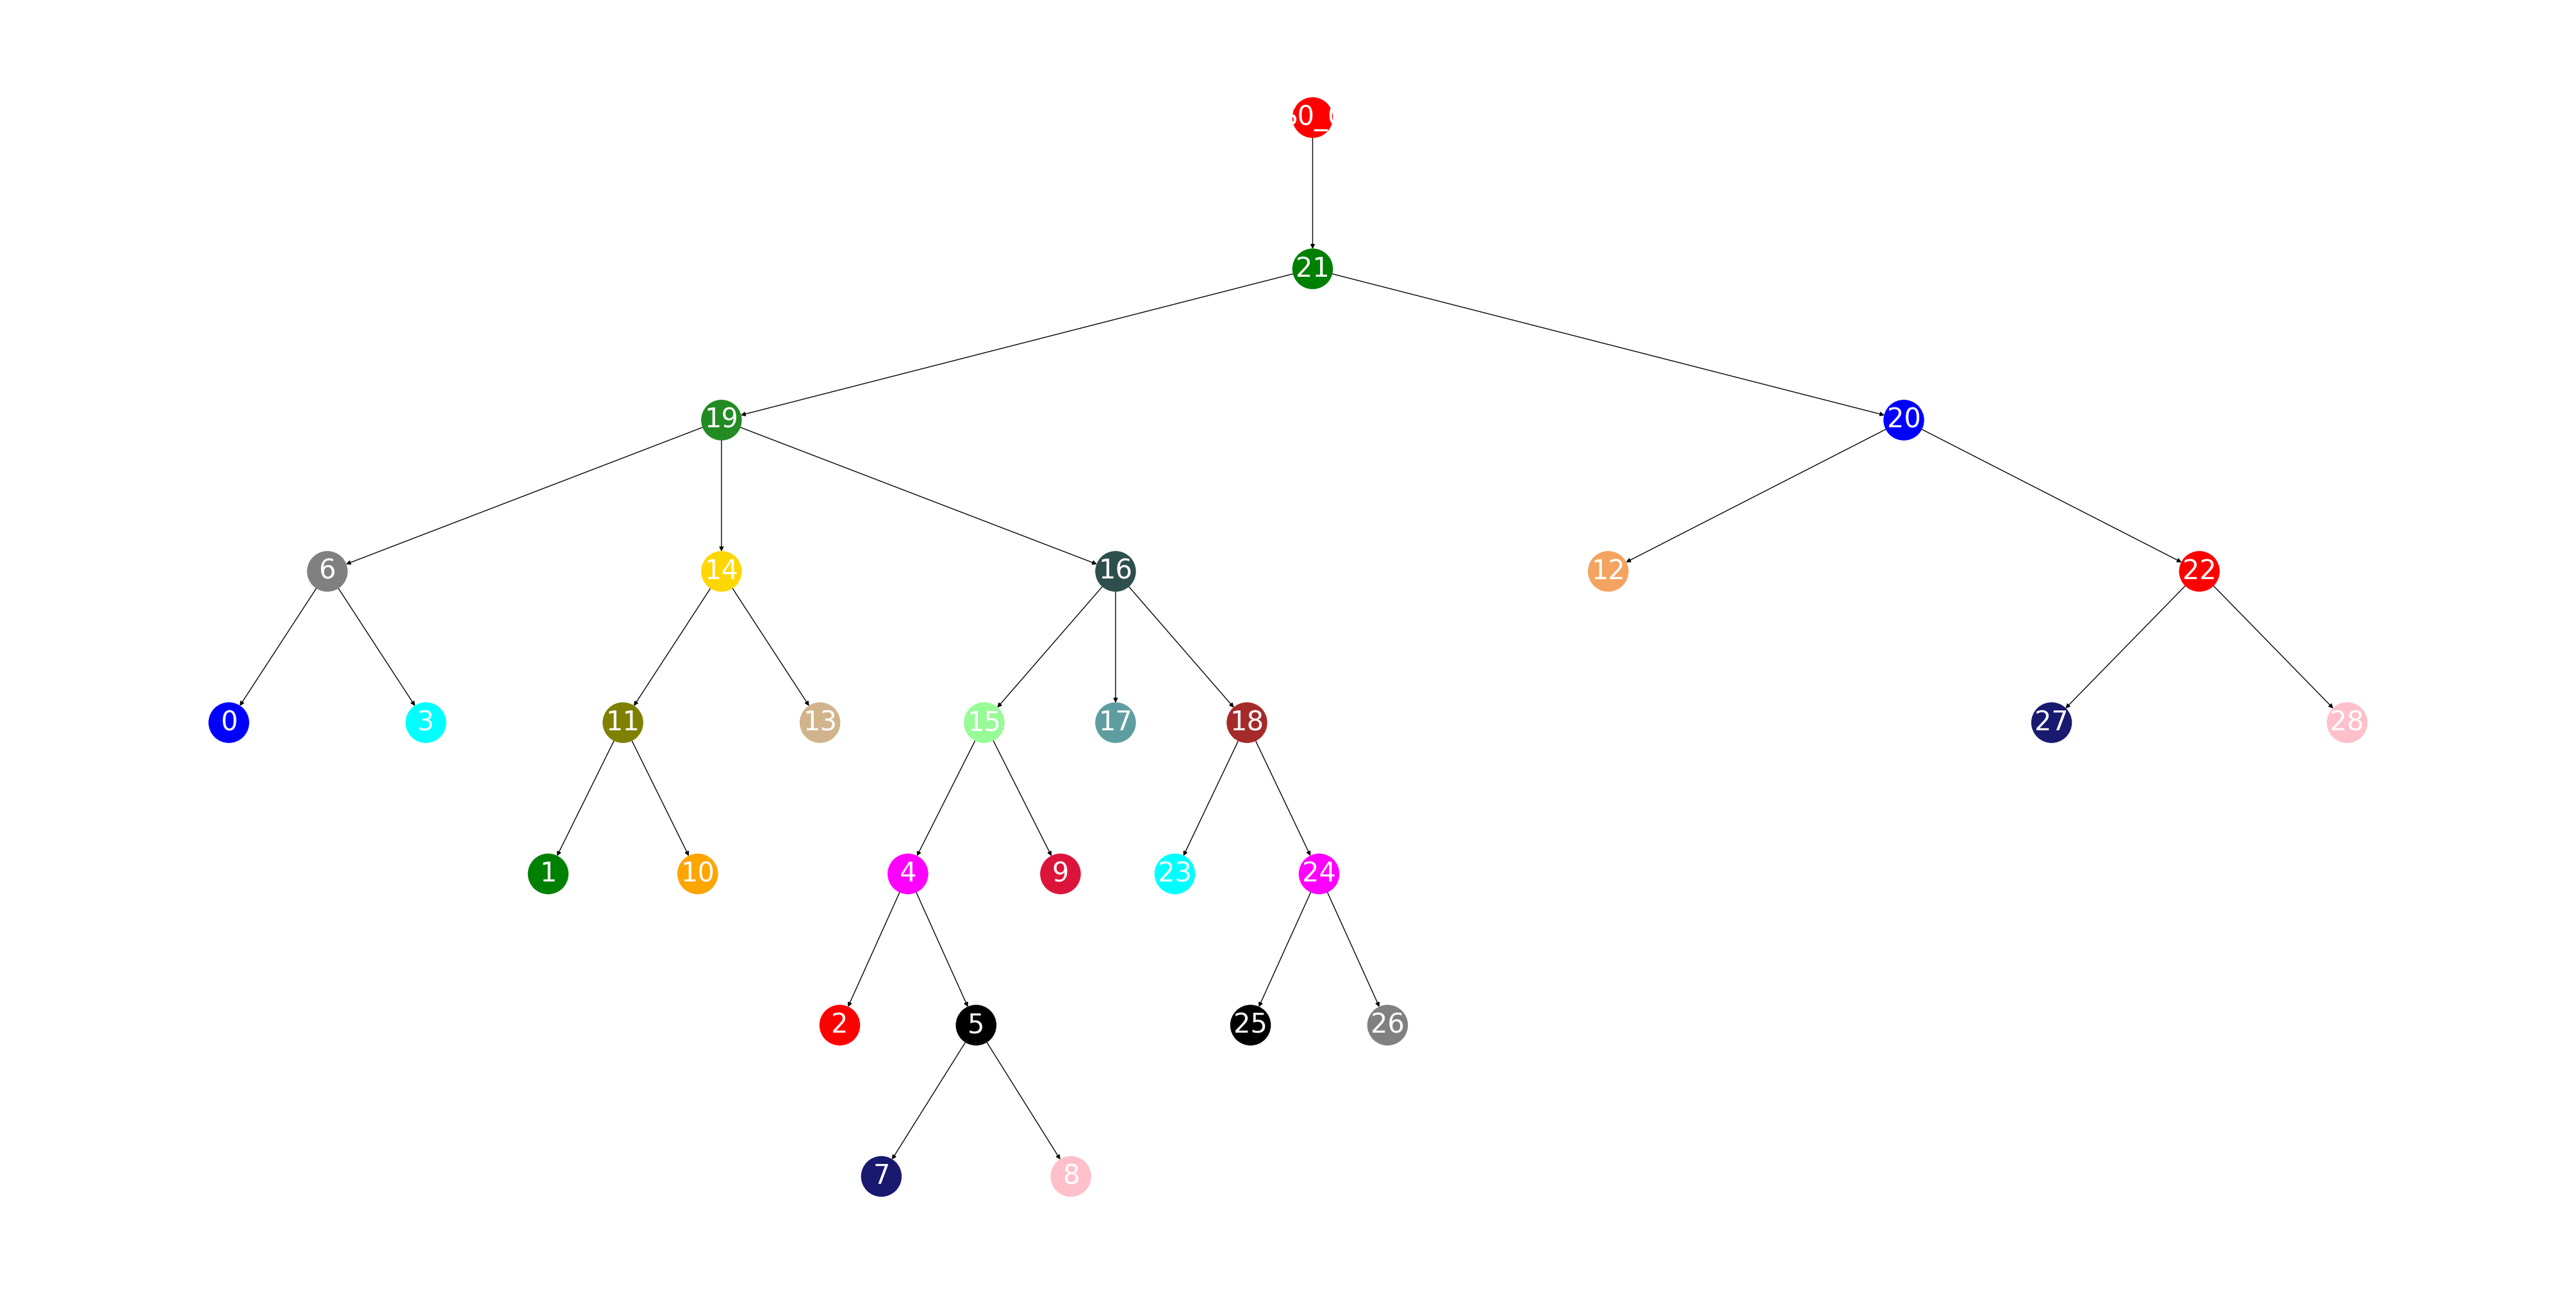

In [30]:
nviz.plot_limb(neuron_obj_rec,0)

In [31]:
branch_idx = 3
limb_idx = 0

branch_mesh = neuron_obj_rec[limb_idx][branch_idx].mesh
ipvu.plot_objects(branch_mesh)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [32]:
_ = branch_mesh.export(f"{segment_id}_limb_{limb_idx}_branch_{branch_idx}.off")

# Step 4A: Multi Soma Split Suggestions

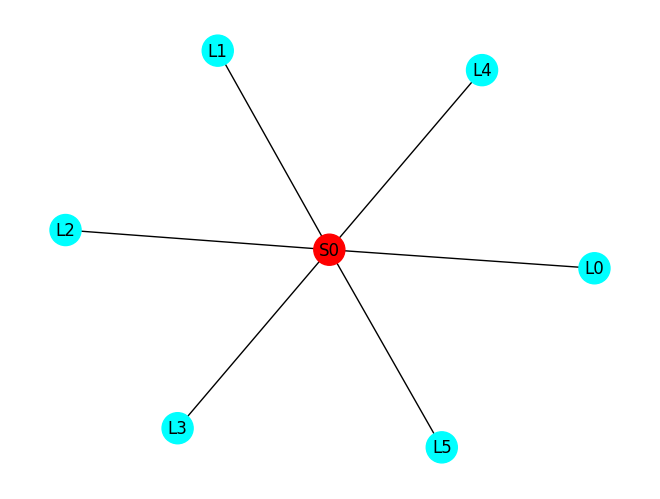

In [33]:
from neurd import neuron_visualizations as nviz
nviz.plot_soma_limb_concept_network(
    neuron_obj
)

In [34]:
multi_soma_split_parameters = dict()

In [35]:
_ = neuron_obj.calculate_multi_soma_split_suggestions(
    plot = True,
    store_in_obj = True,
    **multi_soma_split_parameters
)


In [36]:
neuron_obj.pipeline_products.multi_soma_split_suggestions.multi_soma_split_parameters = multi_soma_split_parameters

# Step 4B: Multi Soma Split Execution

In [37]:
neuron_list = neuron_obj.multi_soma_split_execution(
    verbose = False,
)

No error limbs to processs so just returning the original neuron


In [38]:
n1 = neuron_list[0]
print(n1.pipeline_products)

{
  'decimation':
  {
    'decimation_parameters':
    {
      'decimation_ratio':0.25,
    },
    'segment_id':864691134917511946,
  },
  'soma_identification':
  {
    'glia_meshes':[],
    'nuclei_meshes':[<trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>, <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>, <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>, <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>, <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>, <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>, <trimesh.Trimesh(vertices.shape=(668, 3), faces.shape=(1502, 3))>, <trimesh.Trimesh(vertices.shape=(636, 3), faces.shape=(882, 3))>, <trimesh.Trimesh(vertices.shape=(534, 3), faces.shape=(1170, 3))>, <trimesh.Trimesh(vertices.shape=(2419, 3), faces.shape=(4893, 3))>, <trimesh.Trimesh(vertices.shape=(1665, 3), faces.shape=(2568, 3))>, <trimesh.Trimesh(vertices.shape=(1619, 3), faces

# Step 5: Cell Typing

In [39]:
from neurd import neuron_pipeline_utils as npu

In [40]:
neuron_obj_axon = npu.cell_type_ax_dendr_stage(
    n1,
    mesh_decimated = mesh_decimated,
    plot_axon = False,
)


Number of segments: 3


Number of segments: 4


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segme

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.07it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.3462958335876465
branches_touching_root = [16]
combining close nodes
combine_threshold = 1300
length of Graph = 13106
After combining close endpoints max(kept_branches_idx) = 230, len(kept_branches_idx) = 190
empty_indices % = 0.0
 conflict_indices % = 0.05154251788018087
Decomposing first pass: 13.070088386535645
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 6.67572021484375e-06
Total time for MAP sublimb processing 2.384185791015625e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 6.818771362304688e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.008356571197509766
sbv[0].reshape(-1,3) = [[ 552945.2  757231.5 1044509. ]]
closest_sk_pt_coord BEFORE = [ 552495.72569604  757785.38871569 1044811.89960749]
cu


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 4


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme

Number of segments: 1


Number of segments: 4


Number of segments: 4


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 4


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 1


Number of segmen


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 4


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 1


Number of segments: 1


Number of segments: 3


Number of segments: 3


Number of segments: 1


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 3


Number of segments: 2


Number of segments: 3


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 3


Number of segments: 5


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segments: 2


Number of segme

invalidation_d = 1500
use_adaptive_invalidation_d= False
axon_width_preprocess_limb_max = 200
filter_end_node_length= 1150
filter_end_node_length_meshparty = 1150
invalidation_d = 1500
root_curr = [ 552945.2  757231.5 1044509. ]
Time for preparing soma vertices and root: 0.0002758502960205078
invalidation_d = 1500
smooth_neighborhood = 0
cc_vertex_thresh = 10


100%|██████████| 1/1 [00:00<00:00,  1.02it/s]


meshparty_segment_size = 100
Time for 1st pass MP skeletonization: 1.4520647525787354
branches_touching_root = [16]
combining close nodes
combine_threshold = 1300
length of Graph = 13106
After combining close endpoints max(kept_branches_idx) = 230, len(kept_branches_idx) = 190
empty_indices % = 0.0
 conflict_indices % = 0.05154251788018087
Decomposing first pass: 11.920819997787476
Only Using MeshParty Skeletonization and Mesh Correspondence
Another print
Divinding into MP and MAP pieces: 8.344650268554688e-06
Total time for MAP sublimb processing 2.86102294921875e-06
---- Working on MP Decomposition #0 ----
Using Quicker soma_to_piece_touching_vertices because no MAP and only one sublimb_mesh piece 
MP filtering soma verts: 2.6702880859375e-05
Fixing Possible Soma Extension Branch for Sublimb 0
Total time for mesh KDTree = 0.01077127456665039
sbv[0].reshape(-1,3) = [[ 552945.2  757231.5 1044509. ]]
closest_sk_pt_coord BEFORE = [ 552495.72569604  757785.38871569 1044811.89960749]
curre

In [41]:
nviz.plot_axon(
    neuron_obj_axon
)


 Working on visualization type: mesh

 Working on visualization type: skeleton


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Autoproofreading Stage

About to do syn_density stats
syn_density_post = 0.8402782772616243
syn_density_head = 0.41402484763202696
syn_density_neck = 0.023146958781115428
syn_density_shaft = 0.3192533371508562
sk_length_synapse_density = 2289717.6471943404
About to do spine_density stats
postsyn_limb_branch = {'L0': array([ 0,  1,  3,  4,  6,  9, 10, 11, 12, 13, 14, 15, 17, 18, 22, 23, 24,
       26]), 'L1': array([0, 1, 4, 7]), 'L2': array([ 6,  7, 14]), 'L4': array([0]), 'L5': array([0])}
sk_length = 2190907.7077005897
# of spines = 998
Density = 0.45551895978650103
spine_density = 0.45551895978650103 (multiplier = 1000)
sk_length spine density = 2190907.7077005897
Done stats
Not apply_hand_made_low_rules
For model: LogisticRegression(class_weight={'excitatory': 1, 'inhibitory': 1.5}) 
with features: ['syn_density_shaft', 'spine_density']
pred_class = excitatory, pred_class_label = excitatory
Total time for e/i calculations = 0.19850683212280273
baylor_e_i = excitatory

*****Using v7 Filters!!!


Current no

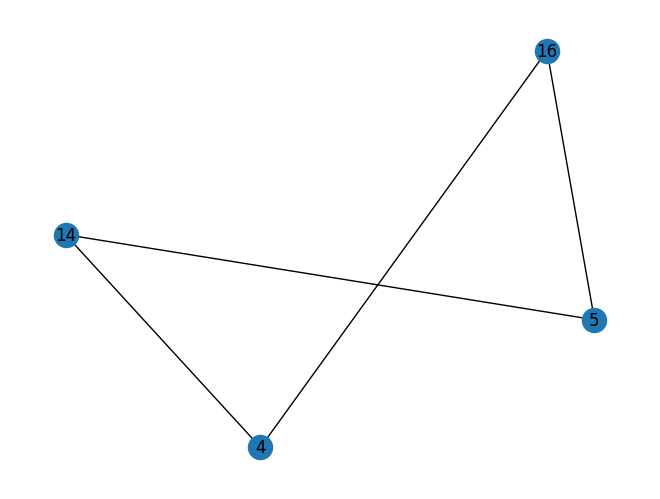

Performing global features query
Done with edge_df: 0.0014064311981201172
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   62.468023               0.383619              0.000335   
1   5  16     23.63    6.718811               0.041261              0.000335   
2  14   4     52.16    2.954579               0.028595              0.000000   
3  16   4     22.12   66.232255               0.641008              0.000000   

   n_synapses_diff  definite_partner_width_delete definite_partner_sk_delete  
0                1                           True                       None  
1                1                          False                       None  
2                0                          False                       None  
3                0                           True                       None  
Afer 

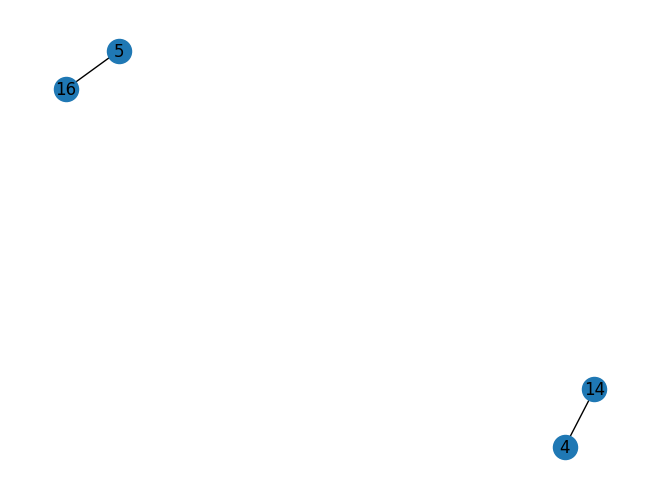

Performing node features query
Done with edge_df: 0.0008077621459960938
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  16     23.63    6.718811               0.041261              0.000335   
1  14   4     52.16    2.954579               0.028595              0.000000   

   n_synapses_diff  definite_partner_width_delete definite_partner_sk_delete  \
0                1                          False                       None   
1                0                          False                       None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  16     23.63    6.718811               0.041261              0.000335   
1  14   4     52.16    2.954579               0.028595          

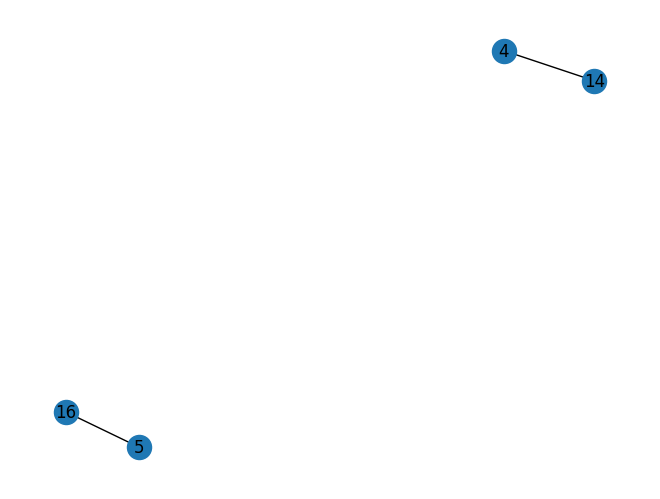

for upstream node 4, winning_node = 14, error_branches = [ 5 16]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (100.3705489424222) less than width_min(250)
Current node skip distance was 1845.1607164272516 but max skip distance was 2300.0
Current node skip distance was 1513.8828772852676 but max skip distance was 1513.8828772852676
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1561.8507304206933 but max skip distance was 1561.8507304206933
Current node skip distance was 1555.4698732187194 but max skip distance was 1555.4698732187194
Current node skip distance was 1724.249003585912 but max skip distance was 1873.1557631602868
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0010111331939697266
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing e

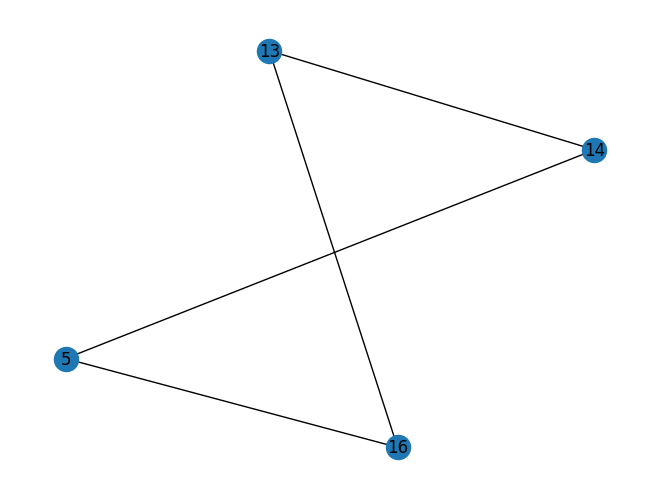

Performing global features query
Done with edge_df: 0.0009503364562988281
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  14     23.88   62.468023               0.383619              0.000335   
1   5  16     23.63    6.718811               0.041261              0.000335   
2  14  13     64.30   10.995221               0.098731              0.000000   
3  16  13     33.57   58.191614               0.522527              0.000000   

   n_synapses_diff definite_partner_width_delete definite_partner_sk_delete  
0                1                          True                       None  
1                1                         False                       None  
2                0                          None                       None  
3                0                          True                       None  
Afer Globa

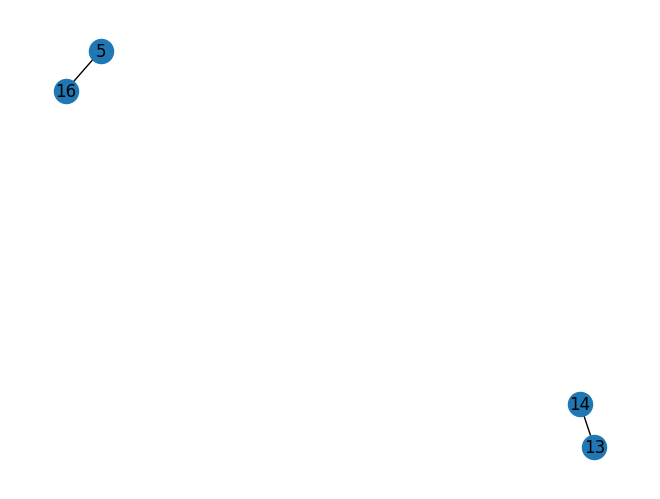

Performing node features query
Done with edge_df: 0.0007481575012207031
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  16     23.63    6.718811               0.041261              0.000335   
1  14  13     64.30   10.995221               0.098731              0.000000   

   n_synapses_diff definite_partner_width_delete definite_partner_sk_delete  \
0                1                         False                       None   
1                0                          None                       None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   5  16     23.63    6.718811               0.041261              0.000335   
1  14  13     64.30   10.995221               0.098731             

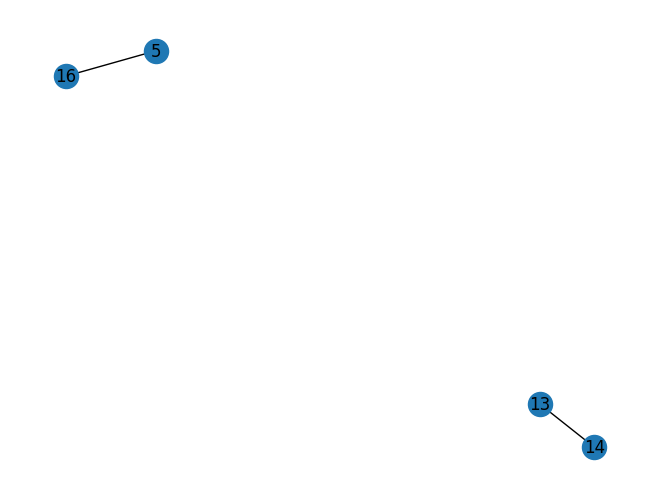

for upstream node 13, winning_node = 14, error_branches = [ 5 16]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (100.3705489424222) less than width_min(250)
Current node skip distance was 1584.877287260092 but max skip distance was 1584.877287260092
Current node skip distance was 1873.1557631602868 but max skip distance was 1873.1557631602868
Current node skip distance was 1696.291383661866 but max skip distance was 2300.0
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008339881896972656
Performing Edge Query
After edge filter, # of rows = 8
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   0   2     83.24   80.583125               1.102563              0.000000   
1   0   4     63.12   38.278706               0.523741        

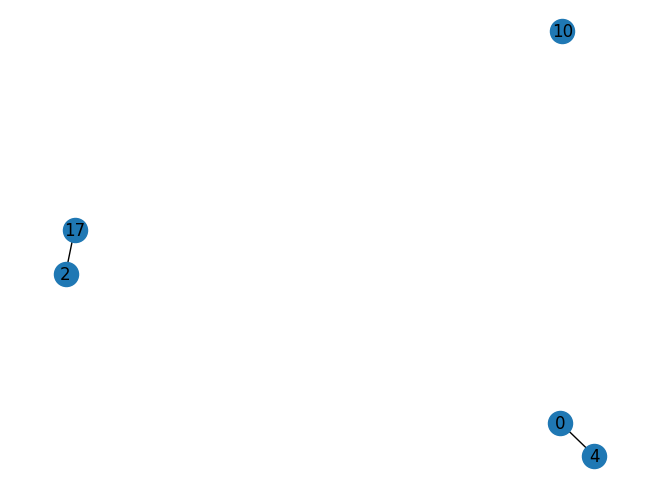

Performing global features query
Done with edge_df: 0.001096487045288086
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  0   4     63.12   38.278706               0.523741                   0.0   
1  2  17      2.31   26.560257               0.208955                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                      False                          None  
Afer Global query: 
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  0   4     63.12   38.278706               0.523741                   0.0   
1  2  17      2.31   26.560257               0.208955                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_del

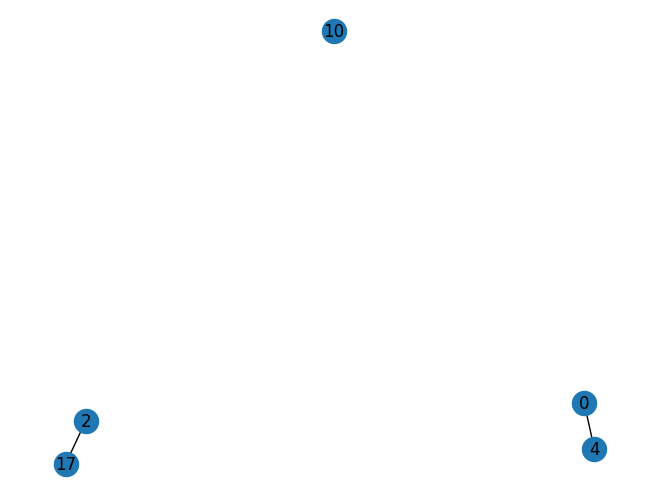

Performing node features query
Done with edge_df: 0.0012772083282470703
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  0   4     63.12   38.278706               0.523741                   0.0   
1  2  17      2.31   26.560257               0.208955                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                      False                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
   u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  0   4     63.12   38.278706               0.523741                   0.0   
1  2  17      2.31   26.560257               0.208955                   

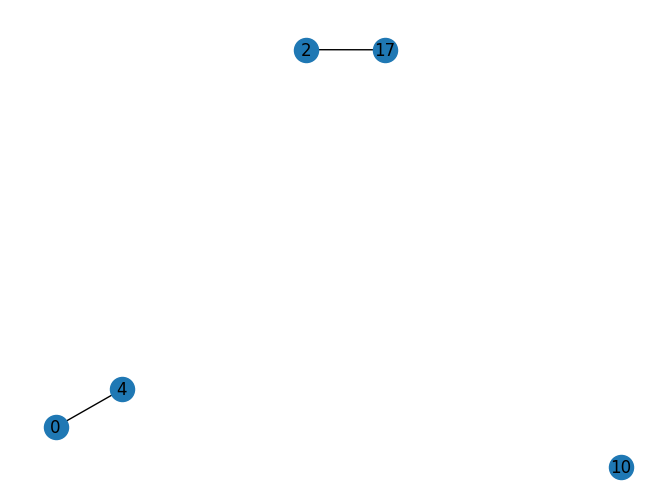

for upstream node 17, winning_node = 2, error_branches = [ 0  4 10]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1451.2212451274277 but max skip distance was 1451.2212451274277
Current node skip distance was 1780.4383686876126 but max skip distance was 1780.4383686876126
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0007462501525878906
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   53.608807               0.421752              0.000000   
1  17  21     70.64    2.759322               0.021708              0.000189   
2  17  19     56.33   20.195276               0.137098              0.00000

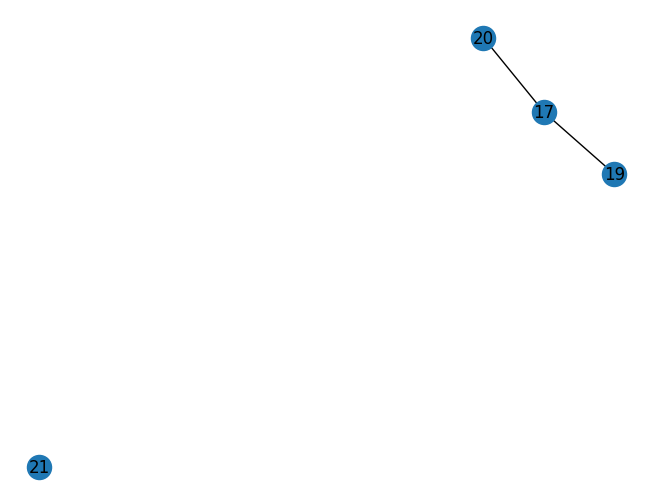

Performing global features query
Done with edge_df: 0.001483917236328125
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   53.608807               0.421752                   0.0   
1  17  19     56.33   20.195276               0.137098                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                0                       False                          None  
1                0                        True                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   53.608807               0.421752                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                0                       False                  

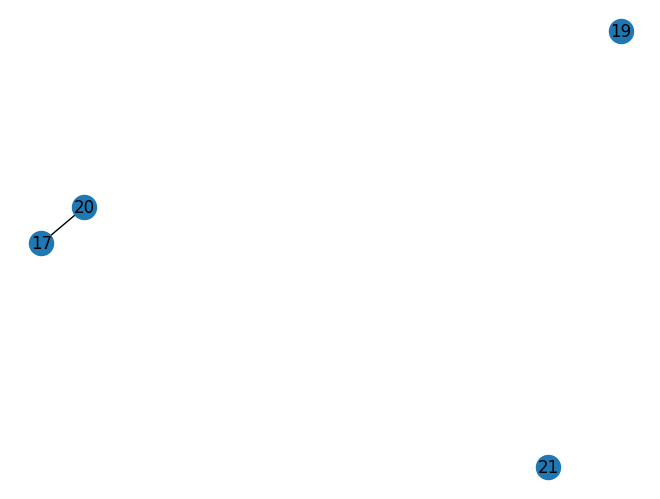

Performing node features query
Done with edge_df: 0.0008356571197509766
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   53.608807               0.421752                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                0                       False                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  17  20     25.83   53.608807               0.421752                   0.0   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                0                       False                          None   

  above_threshold_delete  
0                   None  


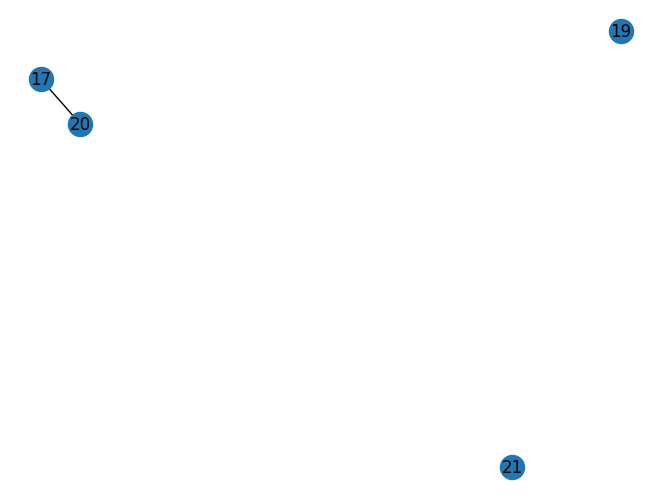

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1472.9213556462446 but max skip distance was 1472.9213556462446
Current node skip distance was 1707.7885606651357 but max skip distance was 1749.0715328743127
Current node skip distance was 1628.3660313908667 but max skip distance was 1628.3660313908667
Current node skip distance was 1480.0483019903613 but max skip distance was 1480.0483019903613
Current node skip distance was 1533.0137920093268 but max skip distance was 1533.0137920093268
Current node skip distance was 1740.1207582708003 but max skip distance was 1780.4383686876126
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009429454803466797
Performing Edge Query
After edge filter, # of rows = 9
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u   v  sk_an

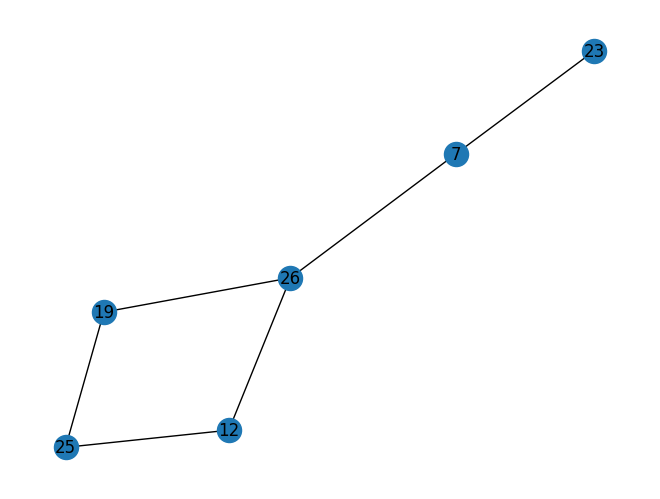

Performing global features query
Done with edge_df: 0.0008549690246582031
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   7  23     13.03    8.120298               0.097445              0.000084   
1   7  26     45.19   13.405755               0.160872              0.000197   
2  12  26     29.39   23.386634               0.250626              0.000281   
3  12  25     43.29   44.316212               0.321998              0.000278   
4  19  26     59.91   77.379073               0.525298              0.000281   
5  19  25     32.65    9.676227               0.070307              0.000278   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                1                      False                          None  
1                1                       True                          None  
2     

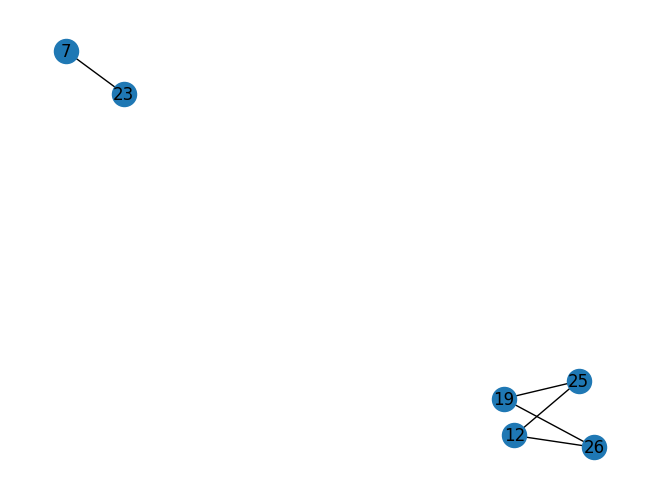

Performing node features query
Done with edge_df: 0.0008029937744140625
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   7  23     13.03    8.120298               0.097445              0.000084   
1  12  26     29.39   23.386634               0.250626              0.000281   
2  12  25     43.29   44.316212               0.321998              0.000278   
3  19  26     59.91   77.379073               0.525298              0.000281   
4  19  25     32.65    9.676227               0.070307              0.000278   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                1                      False                          None   
1                2                       None                          None   
2                1                       None                          None   
3       

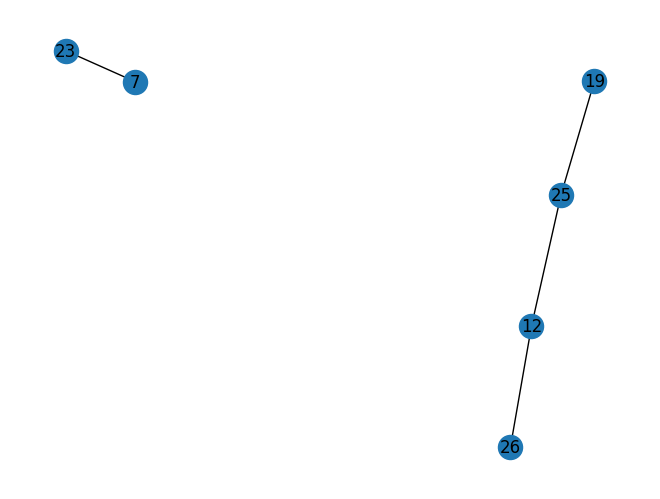

for upstream node 25, winning_node = None, error_branches = [ 7 12 19 23 26]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1458.025565500205 but max skip distance was 1458.025565500205
Current node skip distance was 1473.9583068018837 but max skip distance was 1473.9583068018837
Current node skip distance was 1439.2097328140167 but max skip distance was 1439.2097328140167
Current node skip distance was 1665.7633897842547 but max skip distance was 1740.1207582708003
Current node skip distance was 1673.6697232049405 but max skip distance was 1673.6697232049405
Current node skip distance was 1373.696244750588 but max skip distance was 1373.696244750588
Current node skip distance was 2051.83437664221 but max skip distance was 2051.83437664221
Current node skip distance was 1404.883808123572 but max skip distance was 1404.883808123572
Current node skip distance was 1452.7036445270596 but max skip distance was 1452.703

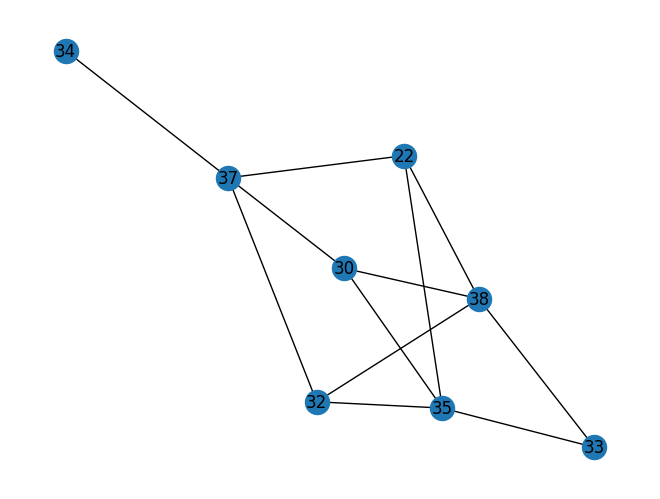

Performing global features query
Done with edge_df: 0.0009844303131103516
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   22  35     41.68   53.635734               0.484043              0.000000   
1   22  38     33.53   51.967919               0.468991              0.000000   
2   22  37     57.51   40.271932               0.266561              0.000197   
3   30  35     22.18   62.611100               0.522703              0.000000   
4   30  38     26.36   60.943285               0.508780              0.000000   
5   30  37     21.22   31.296566               0.207153              0.000197   
6   32  35     30.18   64.508620               0.530147              0.000000   
7   32  38     37.65   62.840805               0.516440              0.000000   
8   32  37     34.81   29.399046               0.194593              0.0

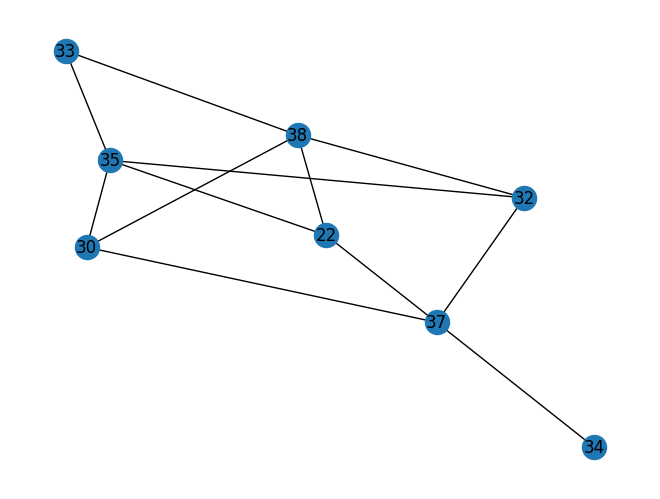

Performing node features query
Done with edge_df: 0.0013802051544189453
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0   22  35     41.68   53.635734               0.484043              0.000000   
1   22  38     33.53   51.967919               0.468991              0.000000   
2   22  37     57.51   40.271932               0.266561              0.000197   
3   30  35     22.18   62.611100               0.522703              0.000000   
4   30  38     26.36   60.943285               0.508780              0.000000   
5   30  37     21.22   31.296566               0.207153              0.000197   
6   32  35     30.18   64.508620               0.530147              0.000000   
7   32  38     37.65   62.840805               0.516440              0.000000   
8   32  37     34.81   29.399046               0.194593              0.00019

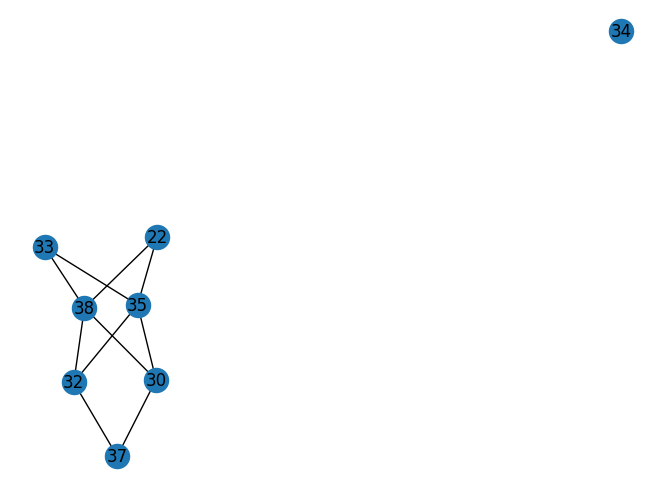

for upstream node 37, winning_node = None, error_branches = [22 30 32 33 34 35 38]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1411.8330370166711 but max skip distance was 1411.8330370166711
Current node skip distance was 1420.3496711923956 but max skip distance was 1420.3496711923956
Current node skip distance was 1554.534817678872 but max skip distance was 1554.534817678872
Current node skip distance was 1635.1270088058568 but max skip distance was 2300.0
Current node skip distance was 1763.4735386570073 but max skip distance was 1763.4735386570073
Current node skip distance was 1806.1698114568499 but max skip distance was 2194.6320494015
Current node skip distance was 1522.4348593997126 but max skip distance was 1522.4348593997126
Current node skip distance was 1413.411712631187 but max skip distance was 1413.411712631187
Current node skip distance was 1525.9250259527623 but max skip distance was 1763.473538

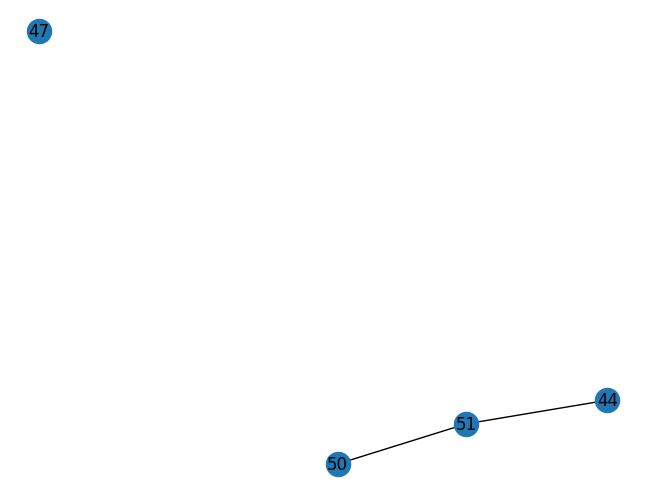

Performing global features query
Done with edge_df: 0.0018498897552490234
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                5                       None                          None  
1                2                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_wi

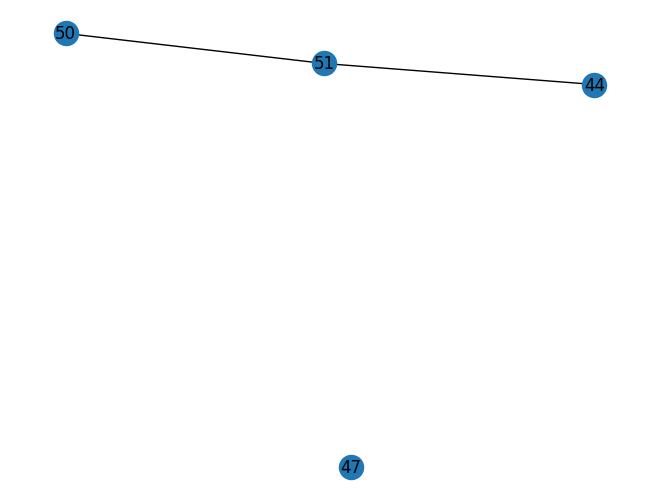

Performing node features query
Done with edge_df: 0.0013191699981689453
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910              0.000012   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                5                       None                          None   
1                2                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  44  51     43.30  141.860633               0.497592              0.000244   
1  50  51     38.68  112.871744               0.395910             

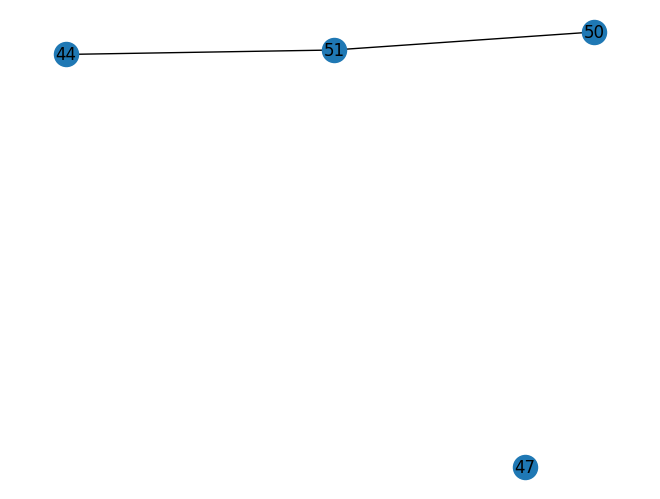

for upstream node 51, winning_node = None, error_branches = [44 47 50]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1384.062406158827 but max skip distance was 1384.062406158827
Current node skip distance was 1393.3073677849236 but max skip distance was 1393.3073677849236
Current node skip distance was 1818.0620153870368 but max skip distance was 2300.0
Current node skip distance was 2045.4162354628888 but max skip distance was 2045.4162354628888
Current node skip distance was 1574.9637046014261 but max skip distance was 2045.4162354628888
Current node skip distance was 1931.3249146464018 but max skip distance was 1931.3249146464018
Current node skip distance was 2193.891740157527 but max skip distance was 2300.0
Current node skip distance was 2058.2699909090625 but max skip distance was 2193.891740157527
Current node skip distance was 1606.4981927587141 but max skip distance was 1606.4981927587141
Current node 

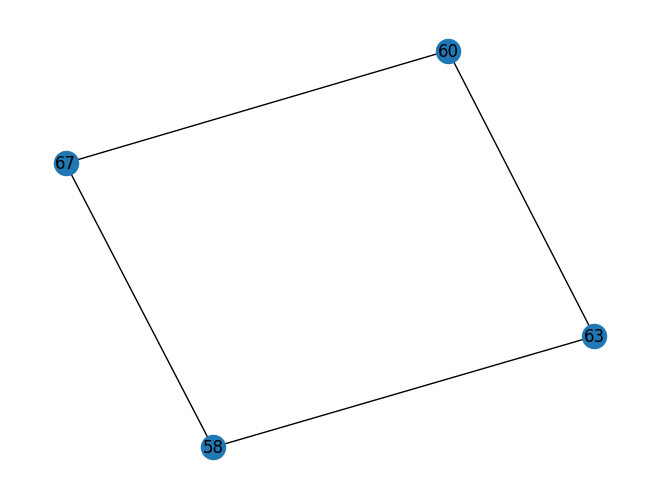

Performing global features query
Done with edge_df: 0.0011315345764160156
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  63     17.13   74.844252               0.763785              0.000132   
1  58  67     16.34   38.721034               0.283230              0.000000   
2  60  63     30.88   68.818716               0.661611              0.000132   
3  60  67     21.11   32.695497               0.239155              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                2                       None                          None  
1                0                       None                          None  
2                2                       None                          None  
3                0                       None                          None  
Afer Globa

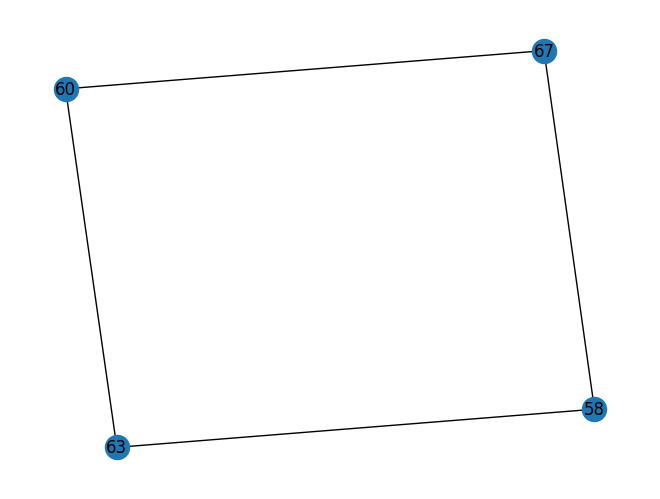

Performing node features query
Done with edge_df: 0.0011987686157226562
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  58  63     17.13   74.844252               0.763785              0.000132   
1  58  67     16.34   38.721034               0.283230              0.000000   
2  60  63     30.88   68.818716               0.661611              0.000132   
3  60  67     21.11   32.695497               0.239155              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                2                       None                          None   
1                0                       None                          None   
2                2                       None                          None   
3                0                       None                          None   

  above_

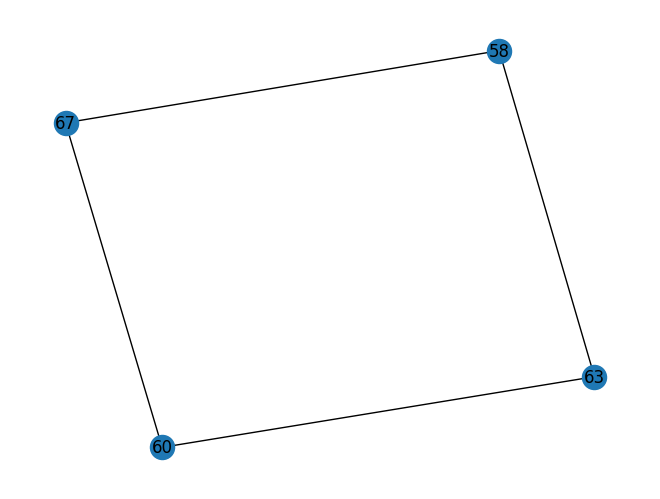

for upstream node 67, winning_node = None, error_branches = [58 60 63]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1953.9356343413892 but max skip distance was 1953.9356343413892
Current node skip distance was 1662.262287860867 but max skip distance was 1953.9356343413892
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1450.8454232028148 but max skip distance was 1450.8454232028148
Current node skip distance was 1527.197767322294 but max skip distance was 1527.197767322294
Current node skip distance was 1777.2547339923058 but max skip distance was 1777.2547339923058
Current node skip distance was 1524.3311587055287 but max skip distance was 1734.0825319279552
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0009419918060302734
Perf

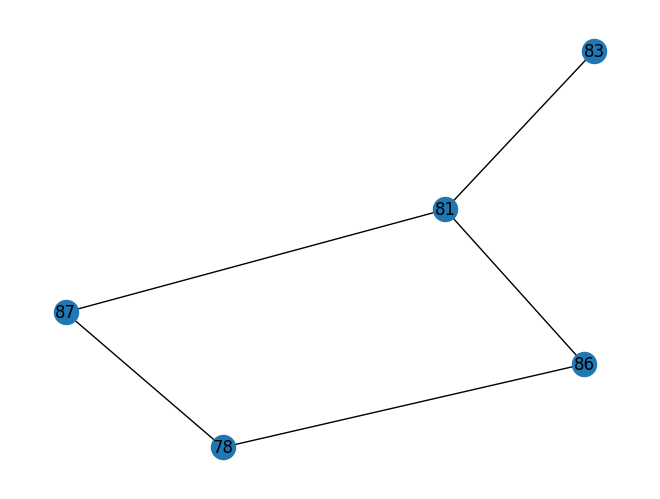

Performing global features query
Done with edge_df: 0.001073598861694336
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  81  83     16.49   52.369436               0.624856                   0.0   
1  81  86     23.95    3.354177               0.040021                   0.0   
2  81  87     49.84   14.337994               0.171077                   0.0   
3  86  78     51.57    1.325071               0.015437                   0.0   
4  87  78     33.58   16.367101               0.190671                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                0                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3        

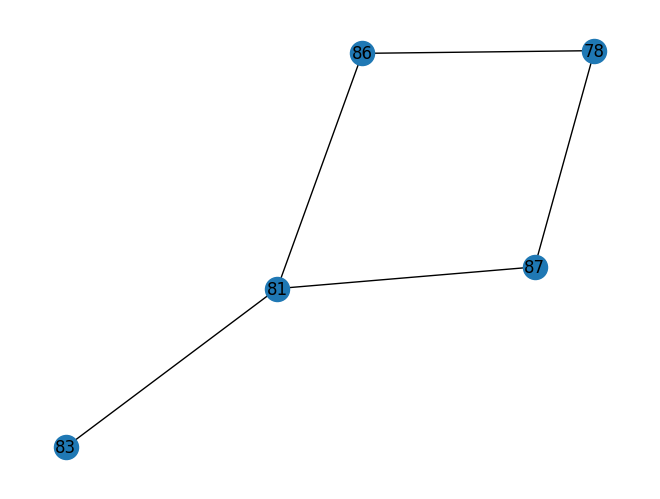

Performing node features query
Done with edge_df: 0.0009100437164306641
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  81  83     16.49   52.369436               0.624856                   0.0   
1  81  86     23.95    3.354177               0.040021                   0.0   
2  81  87     49.84   14.337994               0.171077                   0.0   
3  86  78     51.57    1.325071               0.015437                   0.0   
4  87  78     33.58   16.367101               0.190671                   0.0   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                0                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3       

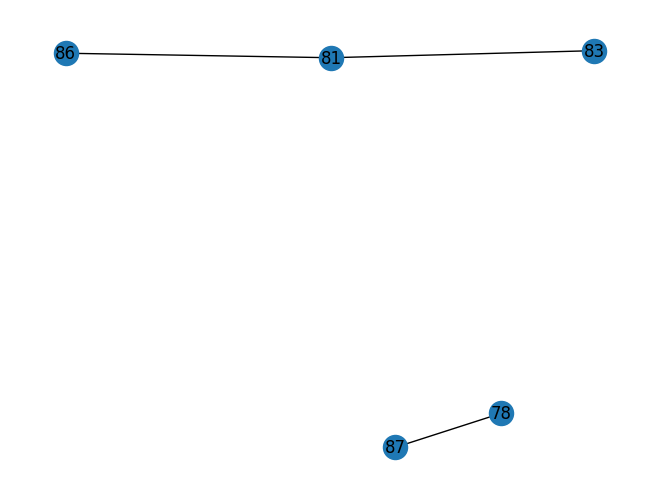

for upstream node 78, winning_node = 87, error_branches = [81 83 86]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1802.1581191685455 but max skip distance was 1818.0620153870368
Current node skip distance was 1496.9905664249752 but max skip distance was 1496.9905664249752
Current node skip distance was 1515.8765468973097 but max skip distance was 1515.8765468973097
Current node skip distance was 2136.1890118918873 but max skip distance was 2136.1890118918873
Current node skip distance was 1734.0825319279552 but max skip distance was 1734.0825319279552
Current node skip distance was 1337.692282914656 but max skip distance was 2136.1890118918873
Current node skip distance was 1529.8522860692515 but max skip distance was 1529.8522860692515
Current node skip distance was 1456.1349055998858 but max skip distance was 1731.8493661848177
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage 

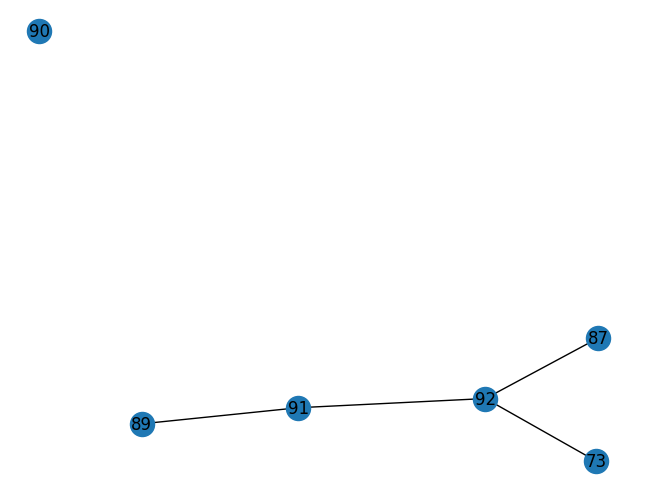

Performing global features query
Done with edge_df: 0.0010209083557128906
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  92     10.84    5.038227               0.073871              0.000174   
1  89  91     64.64   45.526855               0.335635              0.000000   
2  91  92     49.21   16.875864               0.187266              0.000000   
3  92  87     12.25    3.768751               0.054248              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                2                       None                          None  
1                0                       None                          None  
2                0                       None                          None  
3                0                       None                          None  
Afer Globa

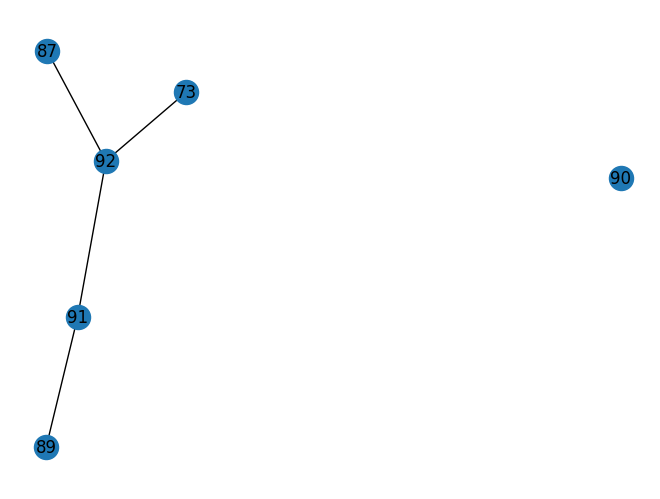

Performing node features query
Done with edge_df: 0.0009360313415527344
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  73  92     10.84    5.038227               0.073871              0.000174   
1  89  91     64.64   45.526855               0.335635              0.000000   
2  91  92     49.21   16.875864               0.187266              0.000000   
3  92  87     12.25    3.768751               0.054248              0.000000   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                2                       None                          None   
1                0                       None                          None   
2                0                       None                          None   
3                0                       None                          None   

  above_

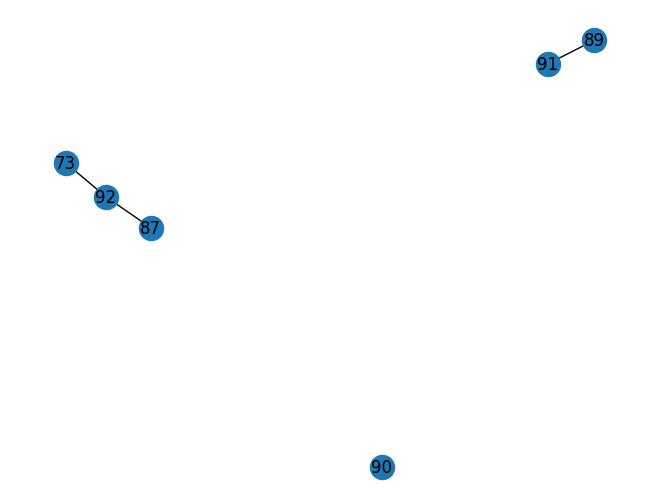

for upstream node 87, winning_node = None, error_branches = [73 89 90 91 92]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1534.705275958714 but max skip distance was 1777.2547339923058
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0007636547088623047
Performing Edge Query
After edge filter, # of rows = 5
Exporting the edges
Deleteing edges only

--- Before Local Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  69  77    112.54   27.598187               0.232029              0.000000   
1  69  82     40.65   75.734193               0.636727              0.000248   
2  69  88     77.03   30.613683               0.346586              0.000112   
3  77  82    101.75   48.136006               0.328481              0.000248   
4  77  88     58

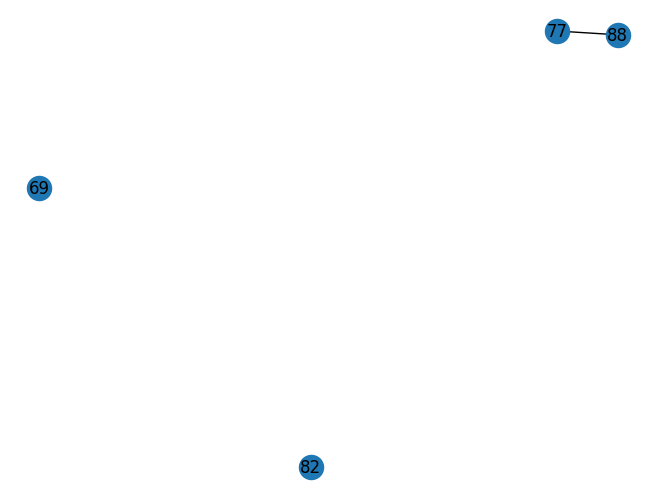

Performing global features query
Done with edge_df: 0.001672506332397461
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  77  88     58.28    58.21187               0.659033              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                7                       None                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  77  88     58.28    58.21187               0.659033              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  
0                7                       None                          None  


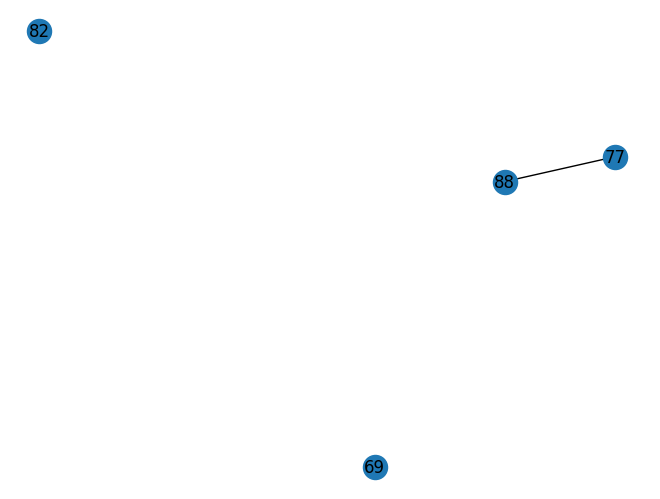

Performing node features query
Done with edge_df: 0.0016679763793945312
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  77  88     58.28    58.21187               0.659033              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                7                       None                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  77  88     58.28    58.21187               0.659033              0.000112   

   n_synapses_diff definite_partner_sk_delete definite_partner_width_delete  \
0                7                       None                          None   

  above_threshold_delete  
0                   None  


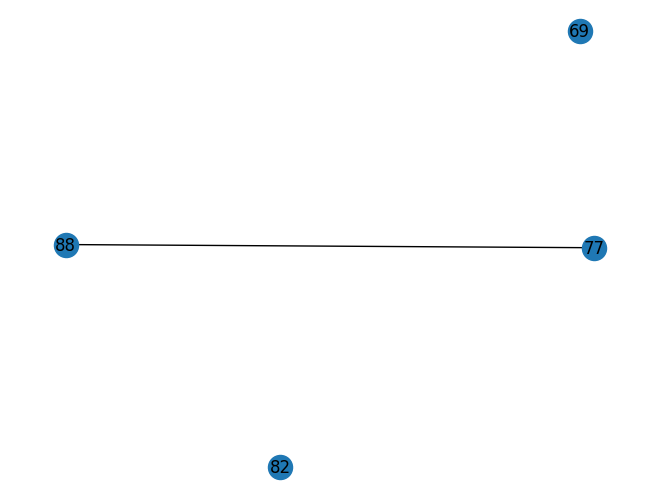

for upstream node 88, winning_node = 77, error_branches = [69 82]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (146.54113615815348) less than width_min(250)
Current node skip distance was 1731.8493661848177 but max skip distance was 1731.8493661848177
Current node skip distance was 1597.9048764230024 but max skip distance was 1597.9048764230024
Current node skip distance was 1542.1541365281187 but max skip distance was 1542.1541365281187
Current node skip distance was 1471.8380360714896 but max skip distance was 1471.8380360714896
Current node skip distance was 1529.1076968233356 but max skip distance was 1770.8299970354453
Current node skip distance was 2270.355504966871 but max skip distance was 2270.355504966871
Current node skip distance was 1500.1006314942724 but max skip distance was 2270.355504966871
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff 

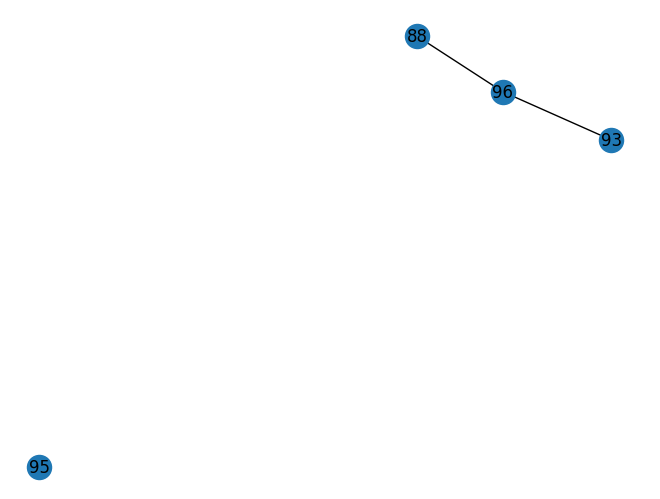

Performing global features query
Done with edge_df: 0.0007269382476806641
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Global Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33    8.305115               0.103783              0.000091   
1  93  96     50.91    6.961696               0.086995              0.000020   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                6                       False                          None  
1                1                        True                          None  
Afer Global query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33    8.305115               0.103783              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  
0                6                       False                 

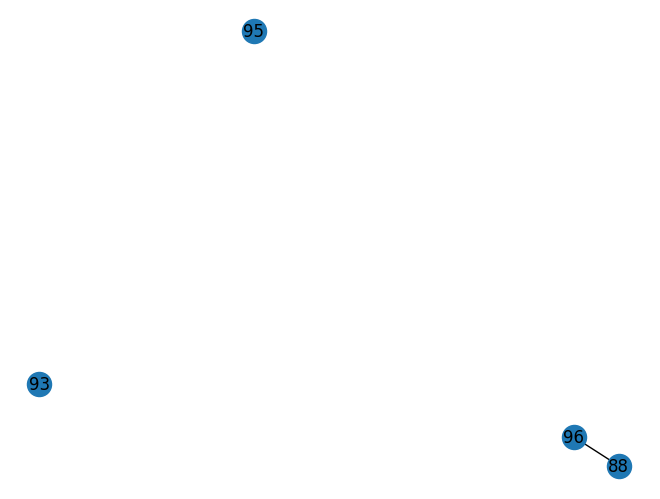

Performing node features query
Done with edge_df: 0.0011718273162841797
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33    8.305115               0.103783              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                6                       False                          None   

  above_threshold_delete  
0                   None  
Afer Node query: 
    u   v  sk_angle  width_diff  width_diff_percentage  synapse_density_diff  \
0  88  96     14.33    8.305115               0.103783              0.000091   

   n_synapses_diff  definite_partner_sk_delete definite_partner_width_delete  \
0                6                       False                          None   

  above_threshold_delete  
0                   None  


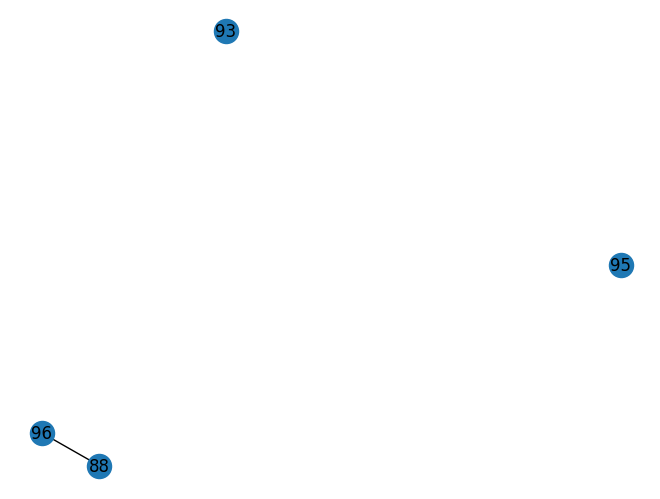

for upstream node 96, winning_node = 88, error_branches = [93 95]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (97.55504075401537) less than width_min(250)
Current node skip distance was 1643.2846806932703 but max skip distance was 1987.0475794936976
Current node skip distance was 1529.5449883497545 but max skip distance was 1529.5449883497545
Current node skip distance was 1714.031247526074 but max skip distance was 1714.031247526074
Current node skip distance was 1987.0475794936976 but max skip distance was 1987.0475794936976
Current node skip distance was 1609.9813074132817 but max skip distance was 1793.1204510959064
Current node skip distance was 1474.71947841323 but max skip distance was 1523.8363056642318
Current node skip distance was 1517.7243823465897 but max skip distance was 1517.7243823465897
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1547.5663767489355 but max skip distance was 1547.56637

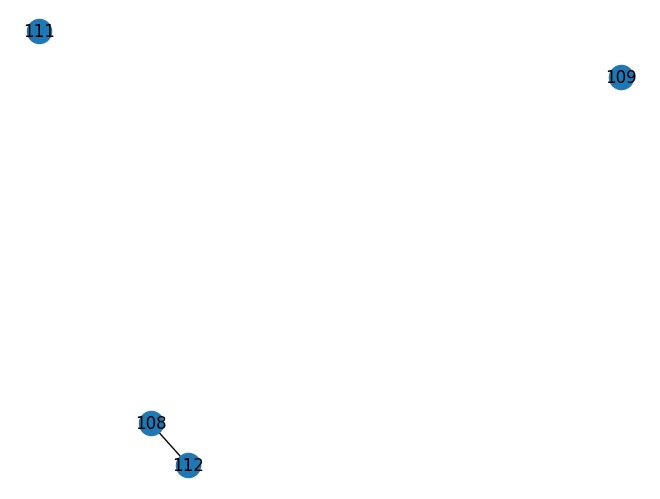

Performing global features query
Done with edge_df: 0.0011963844299316406
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   24.027648                0.28658   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   24.027648                0.28658   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete  
0                          None  


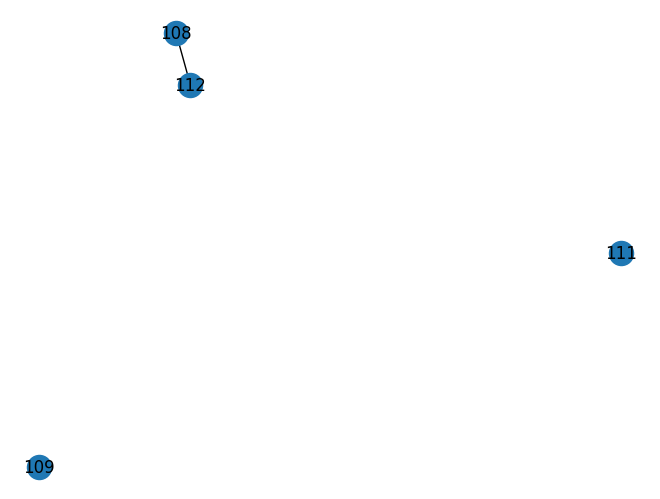

Performing node features query
Done with edge_df: 0.0009014606475830078
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   24.027648                0.28658   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  112  108     41.37   24.027648                0.28658   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000124                1                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


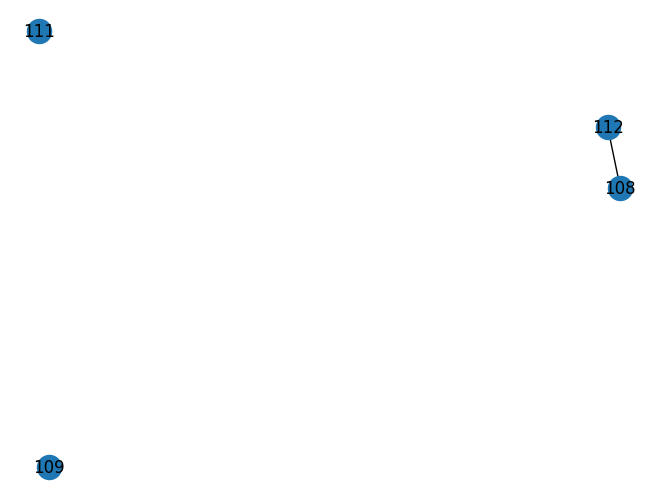

for upstream node 108, winning_node = 112, error_branches = [109 111]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (59.81510376025246) less than width_min(250)
Current node skip distance was 1558.566198516252 but max skip distance was 1558.566198516252
Current node skip distance was 1781.239046371693 but max skip distance was 1781.239046371693
Current node skip distance was 1463.7042418842566 but max skip distance was 1463.7042418842566
Current node skip distance was 1415.8962656677181 but max skip distance was 1415.8962656677181
Current node skip distance was 1504.0873190870434 but max skip distance was 1504.0873190870434
Current node skip distance was 1749.4771642299772 but max skip distance was 1749.4771642299772
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008618831634521484
Performing Edge Query
After edge filter, # of 

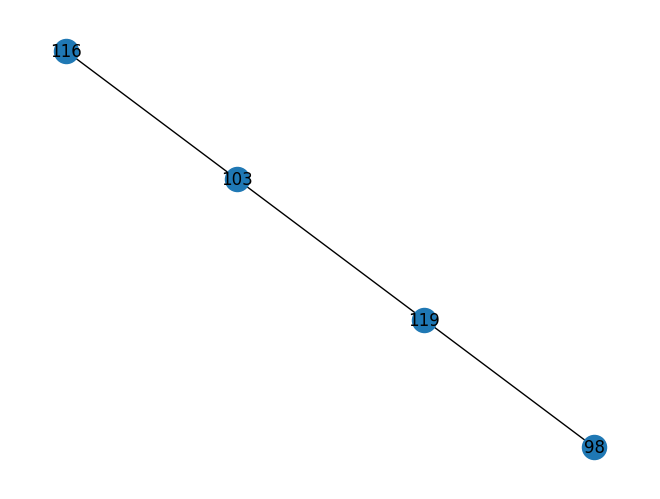

Performing global features query
Done with edge_df: 0.0009274482727050781
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47   11.757901               0.135007   
1  103  119     40.55   31.062618               0.291954   
2  103  116     41.01   33.479006               0.239350   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000075                1                       None   
1              0.000109                2                       None   
2              0.000000                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47   11.757901               0.135007   

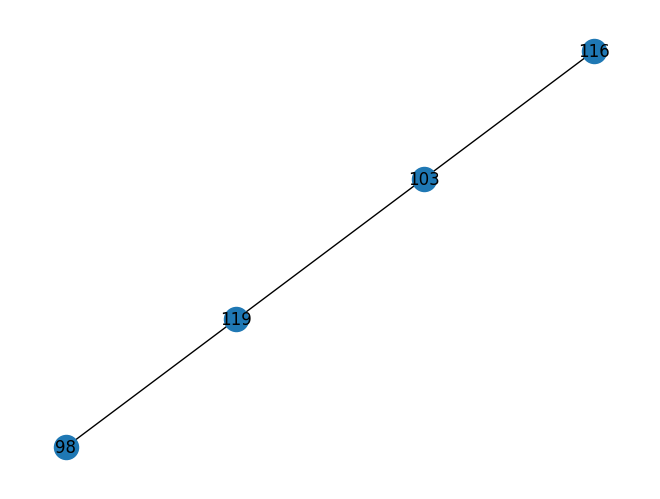

Performing node features query
Done with edge_df: 0.0008780956268310547
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0   98  119     51.47   11.757901               0.135007   
1  103  119     40.55   31.062618               0.291954   
2  103  116     41.01   33.479006               0.239350   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000075                1                       None   
1              0.000109                2                       None   
2              0.000000                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   True  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

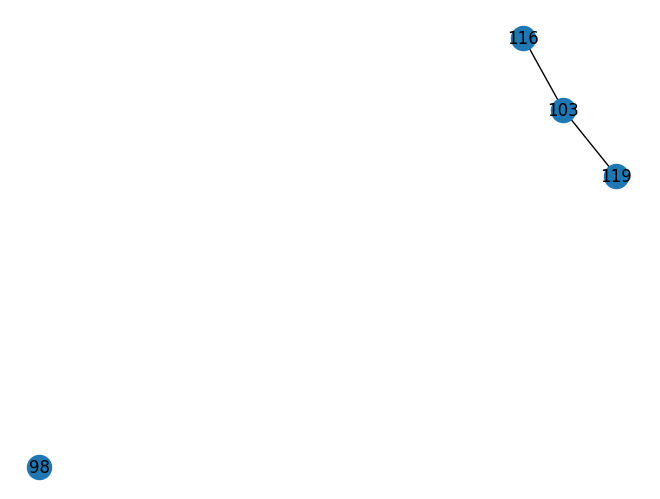

for upstream node 116, winning_node = None, error_branches = [ 98 103 119]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1672.7331996725707 but max skip distance was 2181.275339997049
Current node skip distance was 1680.755460213682 but max skip distance was 2160.016865495054
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0007226467132568359
Performing Edge Query
After edge filter, # of rows = 5
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  120     94.45   27.479371               0.327749   
1  108  122     75.40   21.275256               0.253752   
2  108  118     56.28   39.538558               0.320458   
3  120  122    159.93    6.204114               0.110073   
4  120  118    140.15   6

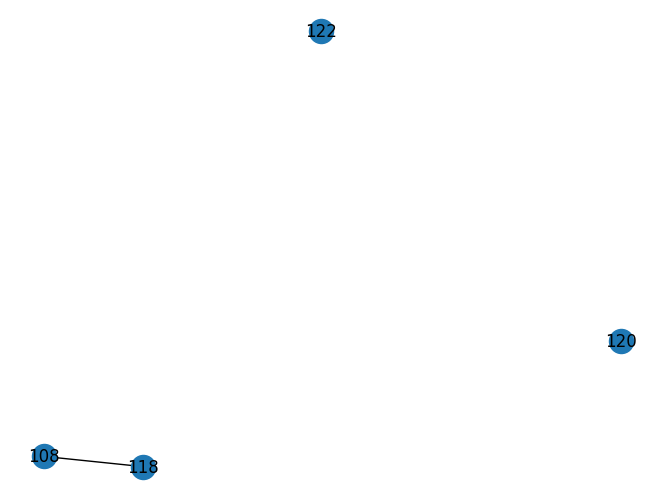

Performing global features query
Done with edge_df: 0.0015075206756591797
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28   39.538558               0.320458   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete  
0                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28   39.538558               0.320458   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete  
0                          None  


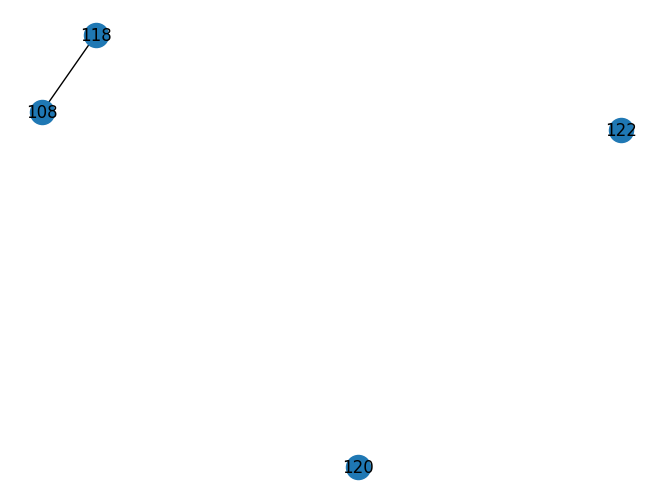

Performing node features query
Done with edge_df: 0.0016186237335205078
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28   39.538558               0.320458   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  108  118     56.28   39.538558               0.320458   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000124                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  


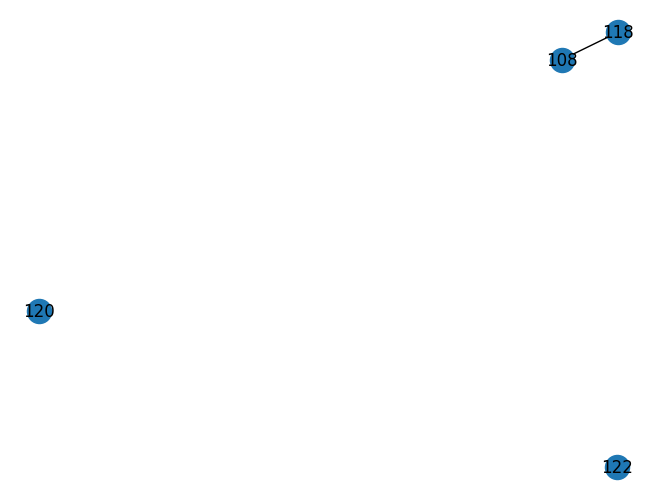

for upstream node 118, winning_node = 108, error_branches = [120 122]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (114.53283578051348) less than width_min(250)
Current node skip distance was 1480.5537322810783 but max skip distance was 1565.537194187007
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0007646083831787109
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   21.442911               0.223996   
1  149  152     73.40   16.637913               0.173802   
2  149  119     96.83   20.396031               0.270745   
3  151  152    115.64    4.804997               0.064682   
4  151  119     68.71    1.046880               0.013897   
5  152  119     12.83    3.758118

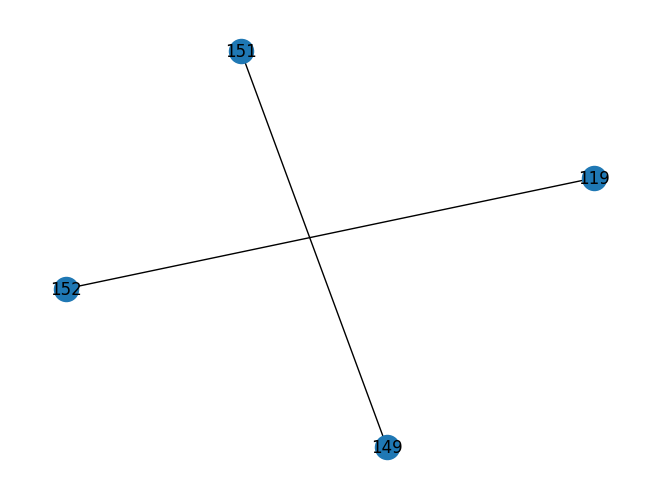

Performing global features query
Done with edge_df: 0.0016429424285888672
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   21.442911               0.223996   
1  152  119     12.83    3.758118               0.049887   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000                0                       False   
1              0.000016                2                       False   

  definite_partner_width_delete  
0                          None  
1                         False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   21.442911               0.223996   
1  152  119     12.83    3.758118               0.049887   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000     

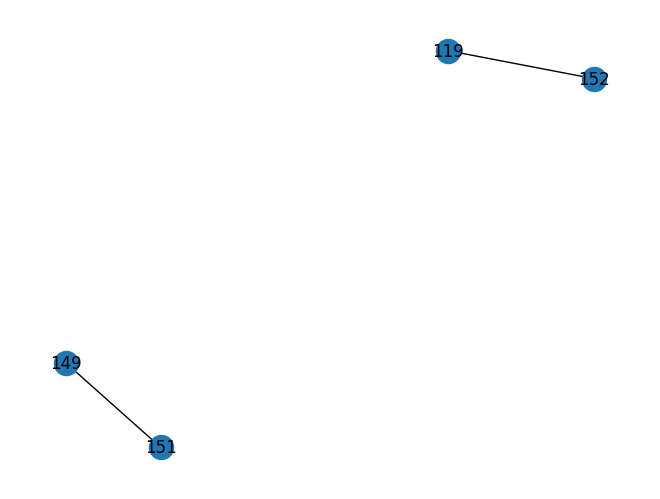

Performing node features query
Done with edge_df: 0.001619577407836914
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   21.442911               0.223996   
1  152  119     12.83    3.758118               0.049887   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000000                0                       False   
1              0.000016                2                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                         False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  149  151     30.73   21.442911               0.223996   
1  152  119     12.83    3.758118               0.049887   

   synapse_density_diff  n_synapses_di

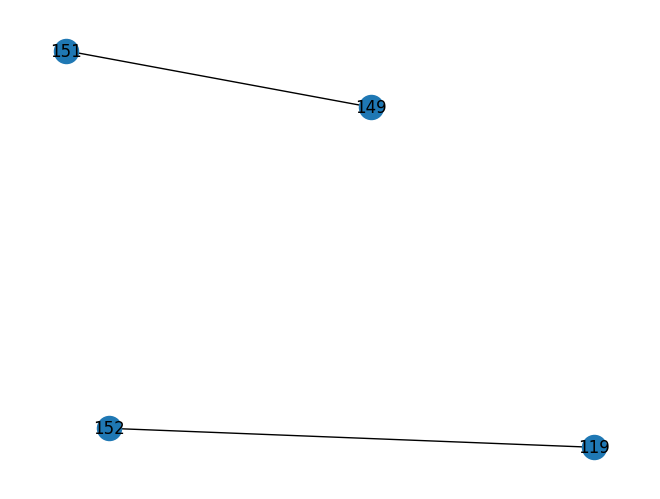

for upstream node 119, winning_node = 152, error_branches = [149 151]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (86.65776251469046) less than width_min(250)
Current node skip distance was 1401.5140890535422 but max skip distance was 1672.7331996725707
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0007779598236083984
Performing Edge Query
After edge filter, # of rows = 3
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.371012               0.203285   
1  117  135     26.31   17.732267               0.186088   
2  117  120    129.50   38.926396               0.690633   
3  134  135    107.21    1.638744               0.021585   
4  134  120     66.14   19.555384               0.346952   
5  135  120     38.50   21.194128

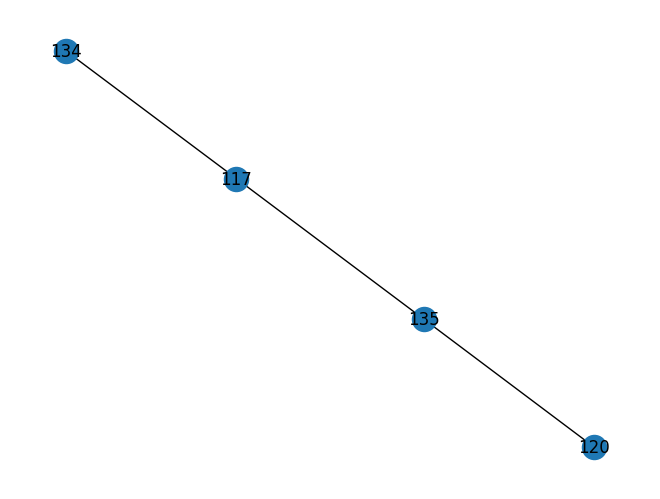

Performing global features query
Done with edge_df: 0.0011126995086669922
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.371012               0.203285   
1  117  135     26.31   17.732267               0.186088   
2  135  120     38.50   21.194128               0.376027   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000119                1                       None   
1              0.000032                0                       None   
2              0.000086                1                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.371012               0.203285   

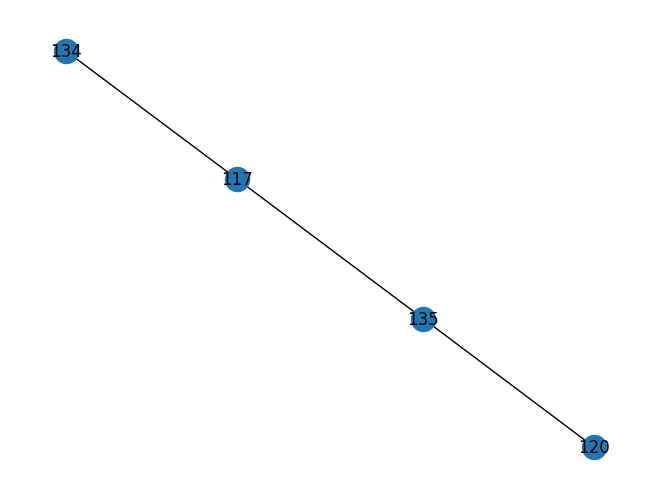

Performing node features query
Done with edge_df: 0.001115560531616211
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  117  134     50.97   19.371012               0.203285   
1  117  135     26.31   17.732267               0.186088   
2  135  120     38.50   21.194128               0.376027   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000119                1                       None   
1              0.000032                0                       None   
2              0.000086                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   True  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff 

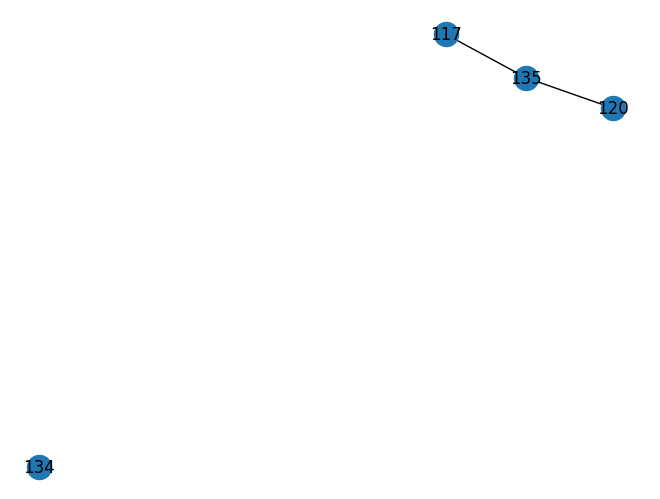

for upstream node 120, winning_node = None, error_branches = [117 134 135]
Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 2220.2012601954266 but max skip distance was 2220.2012601954266
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0007212162017822266
Performing Edge Query
After edge filter, # of rows = 4
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  123     76.31    7.826311               0.053061   
1  110  124     29.09   86.029616               0.583262   
2  110  121     82.29  145.660151               0.496866   
3  123  124     83.10   78.203305               0.559911   
4  123  121     26.58  153.486462               0.523563   
5  124  121    122.22  231.689767               0.790325 

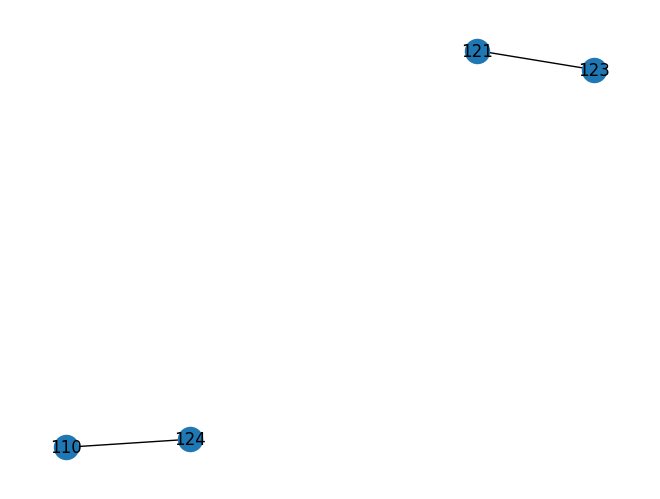

Performing global features query
Done with edge_df: 0.0011599063873291016
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  153.486462               0.523563   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107                1                       False   
1              0.000000                0                       False   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  153.486462               0.523563   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107     

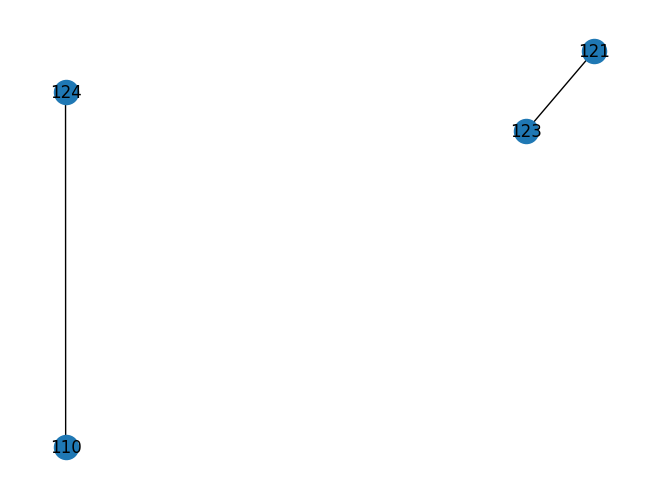

Performing node features query
Done with edge_df: 0.0010645389556884766
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  153.486462               0.523563   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0              0.000107                1                       False   
1              0.000000                0                       False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  110  124     29.09   86.029616               0.583262   
1  123  121     26.58  153.486462               0.523563   

   synapse_density_diff  n_synapses_d

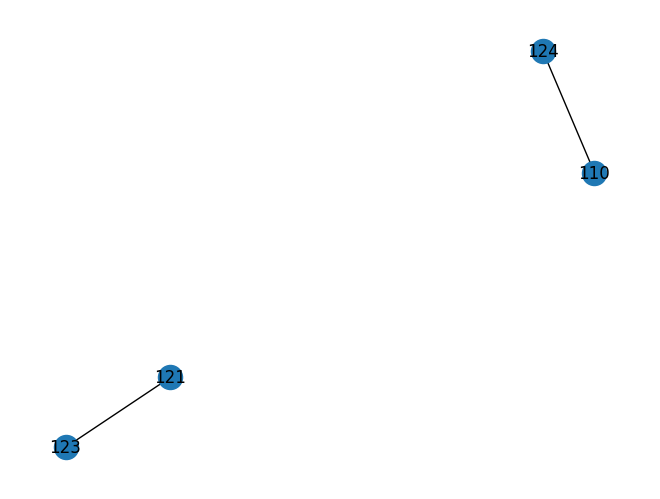

for upstream node 121, winning_node = 123, error_branches = [110 124]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (139.67105997309528) less than width_min(250)
Current node skip distance was 1427.3645655675011 but max skip distance was 1427.3645655675011
Current node skip distance was 1748.6294165545632 but max skip distance was 2081.04425645207
Current node skip distance was 1422.78231181406 but max skip distance was 1422.78231181406
Current node skip distance was 1451.9504876031956 but max skip distance was 1451.9504876031956
Current node skip distance was 2081.04425645207 but max skip distance was 2081.04425645207
Current node skip distance was 1556.065657251308 but max skip distance was 1556.065657251308
Current node skip distance was 1550.1241718840056 but max skip distance was 2142.10638786454
Current node skip distance was 1449.2351447639921 but max skip distance was 1449.2351447639921
Current node skip distance was 1903.260530500776 but max skip dis

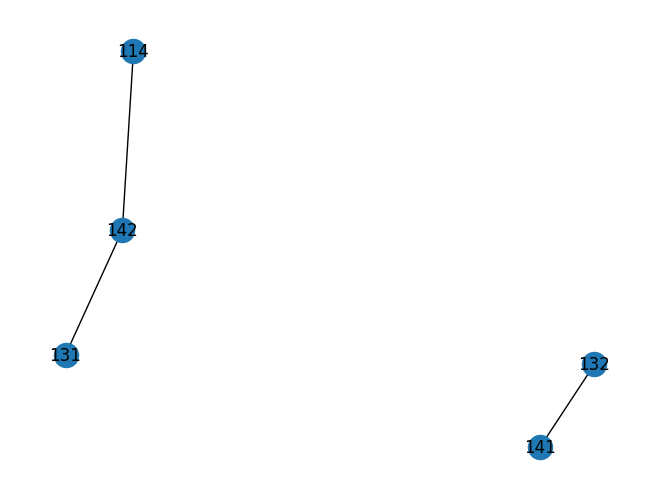

Performing global features query
Done with edge_df: 0.0013811588287353516
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  131  142     14.97   14.582371               0.215027   
2  141  132      6.99   68.881320               0.389639   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   

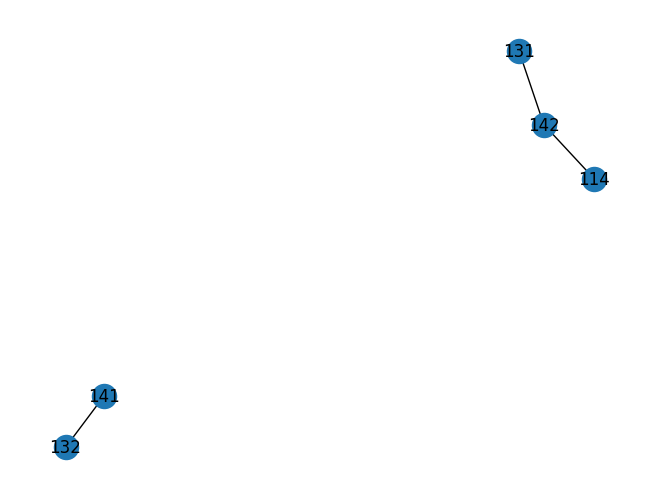

Performing node features query
Done with edge_df: 0.0014476776123046875
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  131  142     14.97   14.582371               0.215027   
2  141  132      6.99   68.881320               0.389639   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

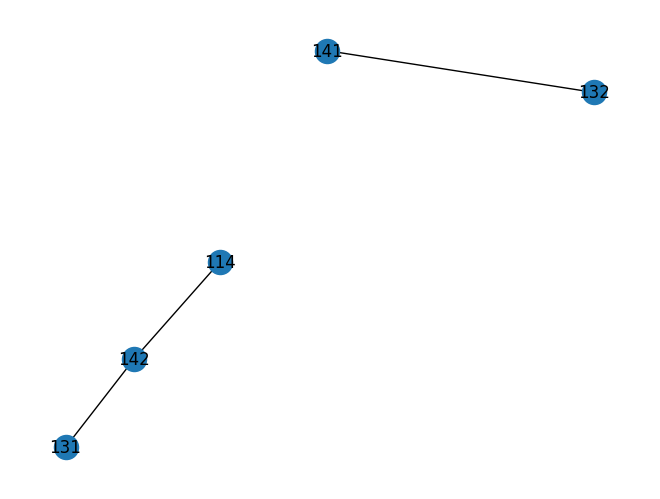

for upstream node 132, winning_node = 141, error_branches = [114 131 142]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1844.3747246878092 but max skip distance was 1903.260530500776
Current node skip distance was 1482.9948556594456 but max skip distance was 1482.9948556594456
Current node skip distance was 1489.8229576486824 but max skip distance was 1489.8229576486824
Current node skip distance was 1987.7850886264841 but max skip distance was 1987.7850886264841
Current node skip distance was 1438.644682135058 but max skip distance was 1438.644682135058
Current node skip distance was 2300 but max skip distance was 2300.0
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008637905120849609
Performing Edge Query
After edge filter, # of rows = 7
Exporting the edges
Deletei

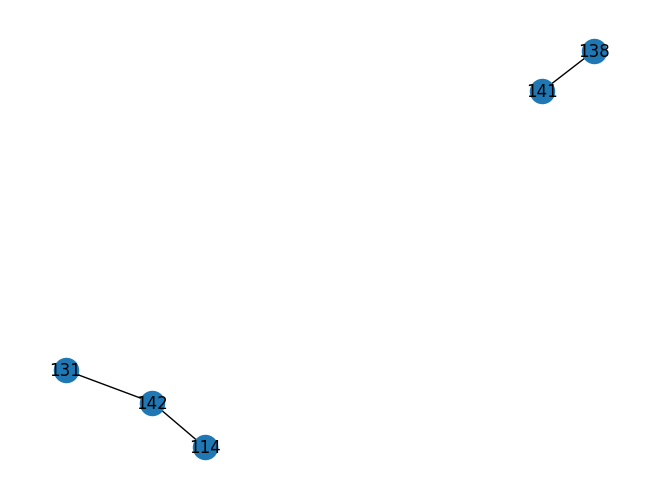

Performing global features query
Done with edge_df: 0.0010225772857666016
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  131  142     14.97   14.582371               0.215027   
2  141  138      8.36  110.143312               0.505141   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   

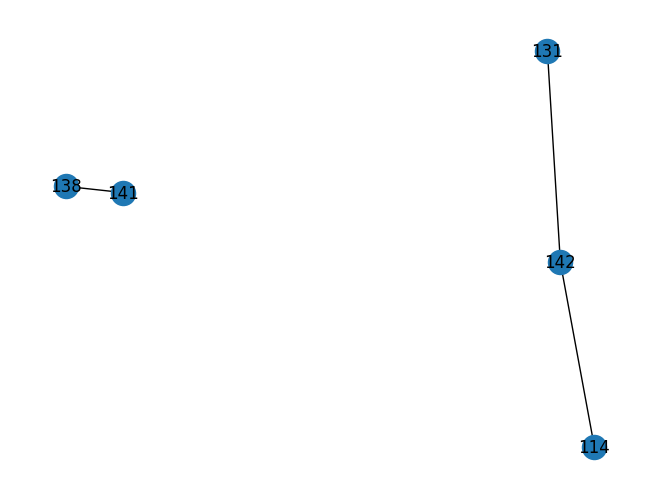

Performing node features query
Done with edge_df: 0.0008053779602050781
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  114  142     14.12   27.746893               0.342635   
1  131  142     14.97   14.582371               0.215027   
2  141  138      8.36  110.143312               0.505141   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0                   0.0                0                       None   
1                   0.0                0                       None   
2                   0.0                0                      False   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   None  
2                          None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff

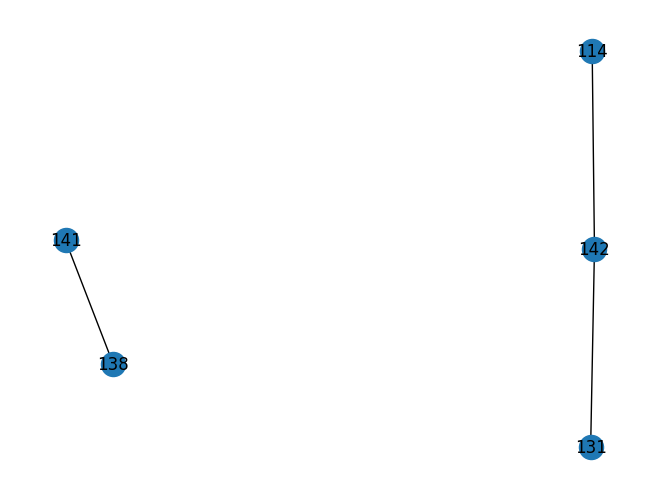

for upstream node 138, winning_node = 141, error_branches = [114 131 142]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1616.2550294890978 but max skip distance was 1616.2550294890978
Current node skip distance was 1388.475263960896 but max skip distance was 1388.475263960896
Current node skip distance was 1790.7023490289369 but max skip distance was 1844.3747246878092
Current node skip distance was 1523.8363056642318 but max skip distance was 1523.8363056642318
Current node skip distance was 1829.4403823438417 but max skip distance was 1829.4403823438417
Current node skip distance was 1421.7240957317867 but max skip distance was 1582.549407543017
Current node skip distance was 1565.537194187007 but max skip distance was 1565.537194187007
Current node skip distance was 1523.309289572226 but max skip distance was 1523.309289572226
Current node skip distance was 1476.191732818093 but max skip distance

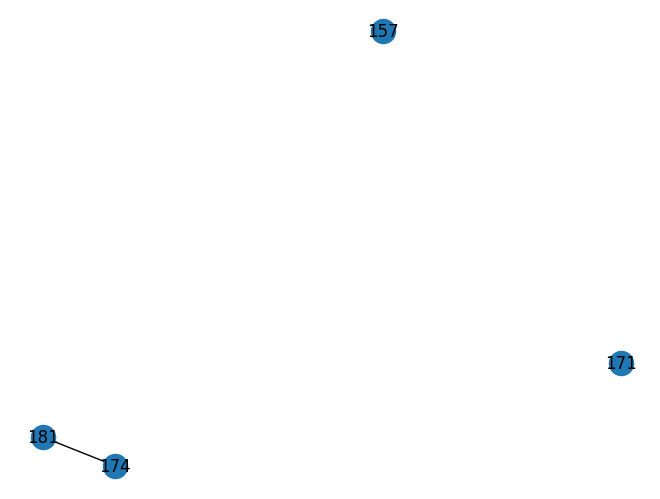

Performing global features query
Done with edge_df: 0.0010082721710205078
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    1.485128                0.00706   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete  
0                          False  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    1.485128                0.00706   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete  
0                          False  


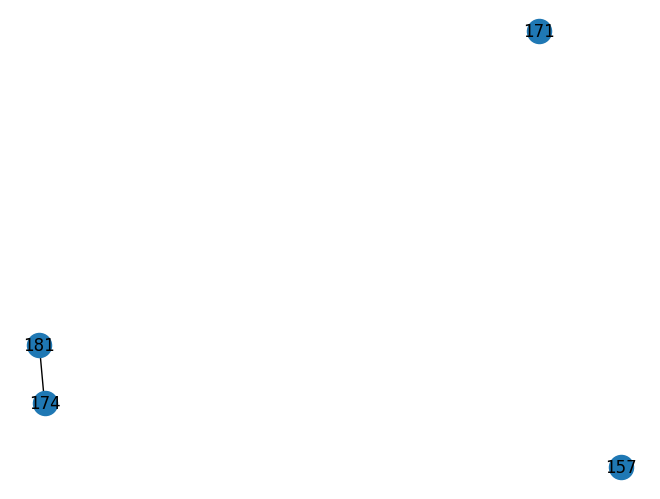

Performing node features query
Done with edge_df: 0.0010235309600830078
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    1.485128                0.00706   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  174  181      6.21    1.485128                0.00706   

   synapse_density_diff  n_synapses_diff  definite_partner_sk_delete  \
0                   0.0                0                       False   

   definite_partner_width_delete above_threshold_delete  
0                          False                   None  


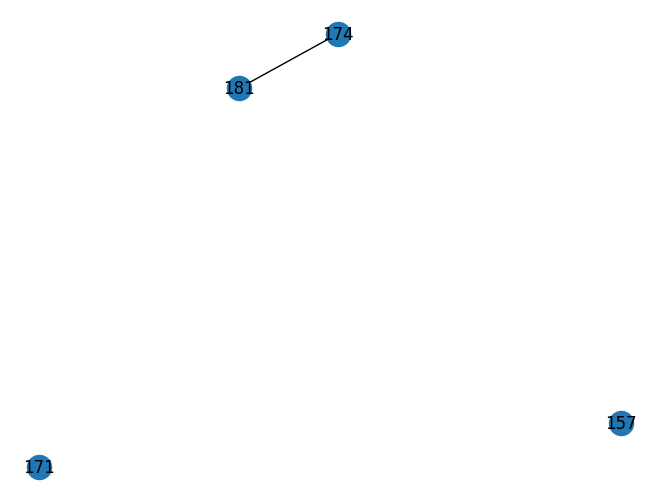

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1839.1475043627704 but max skip distance was 1839.1475043627704
Current node skip distance was 1509.5717731202838 but max skip distance was 1839.1475043627704
Current node skip distance was 1496.297961013633 but max skip distance was 1496.297961013633
Current node skip distance was 1708.0404981634042 but max skip distance was 1708.0404981634042
Current node skip distance was 1538.798310905582 but max skip distance was 1708.0404981634042
Current node skip distance was 1826.1596999594053 but max skip distance was 1826.1596999594053
Current node skip distance was 1528.3276439058811 but max skip distance was 1528.3276439058811
Current node skip distance was 1443.4813042766389 but max skip distance was 1826.1596999594053
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff <

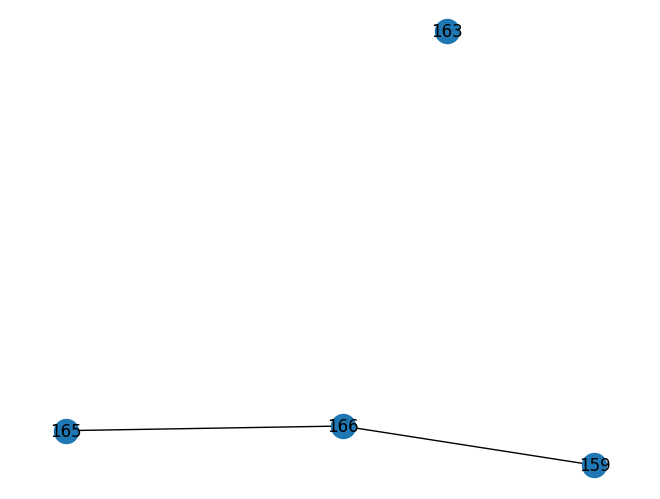

Performing global features query
Done with edge_df: 0.001994609832763672
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   14.469749               0.175823   
1  166  165     62.35    1.391964               0.020952   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                1                       None   
1              0.000117                0                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   14.469749               0.175823   
1  166  165     62.35    1.391964               0.020952   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029          

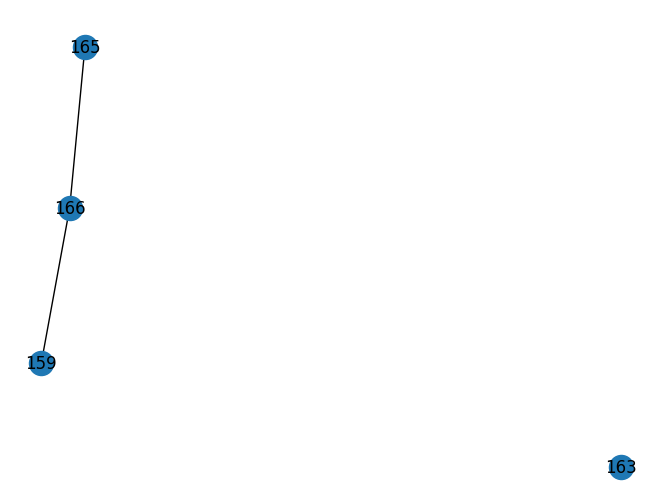

Performing node features query
Done with edge_df: 0.0008718967437744141
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   14.469749               0.175823   
1  166  165     62.35    1.391964               0.020952   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029                1                       None   
1              0.000117                0                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None                   True  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  159  166     37.49   14.469749               0.175823   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000029      

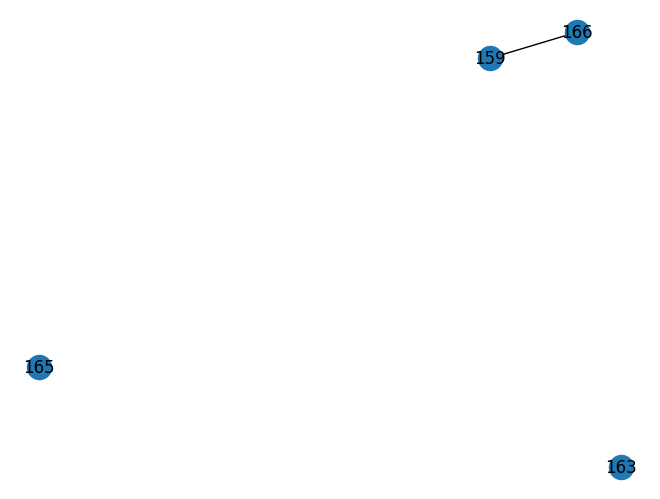

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1449.2811525835264 but max skip distance was 1449.2811525835264
Current node skip distance was 1438.767729220468 but max skip distance was 1438.767729220468
Current node skip distance was 1475.2074182306028 but max skip distance was 1823.5915015780622
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0007970333099365234
Performing Edge Query
After edge filter, # of rows = 6
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  160  165    150.60   12.675998               0.160229   
1  160  175      5.52   78.550450               0.992908   
2  160  168    145.72    5.061730               0.068356   
3  165  175     32.25   91.226447               1.373158   
4  1

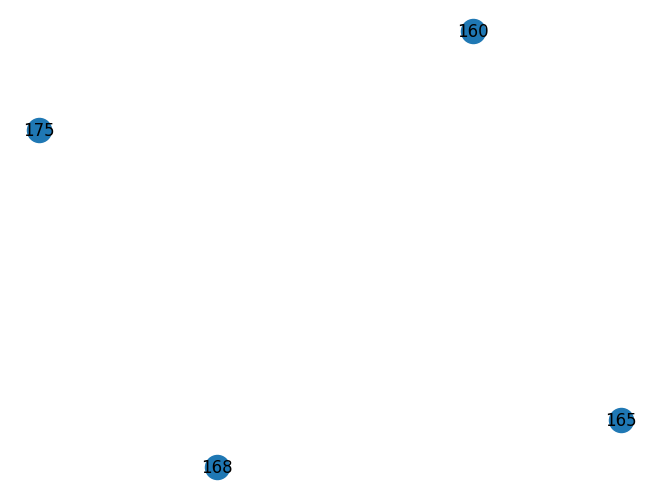

Inside high_degree_false_positive_low_sibling_filter ****
No winning branch so returning
Current node skip distance was 1499.8793134528105 but max skip distance was 1499.8793134528105
Current node skip distance was 1620.2566940446043 but max skip distance was 1620.2566940446043
Current node skip distance was 1411.1062163020465 but max skip distance was 1496.297961013633
Current node skip distance was 2043.116387471698 but max skip distance was 2300.0
Current node skip distance was 1823.5915015780622 but max skip distance was 1823.5915015780622
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0008215904235839844
Performing Edge Query
After edge filter, # of rows = 6
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    5.328512               0.092817   
1  176

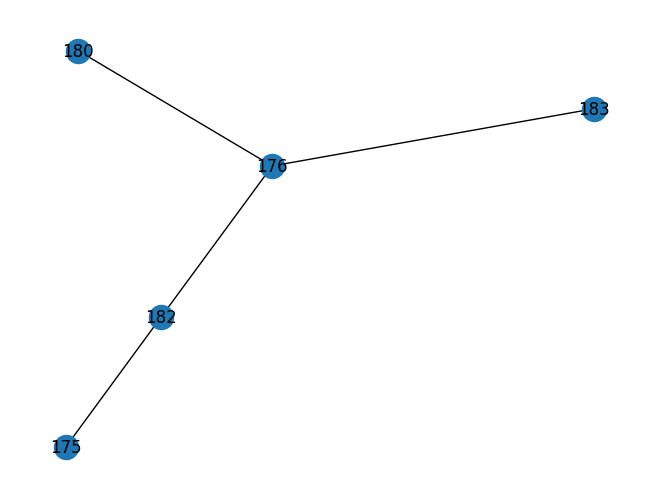

Performing global features query
Done with edge_df: 0.0009086132049560547
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    5.328512               0.092817   
1  176  182     54.70   44.139437               0.768864   
2  176  183      8.95    4.869116               0.084815   
3  182  175     64.98   56.113901               0.355913   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000000                0                       None   
1              0.000243                1                       None   
2              0.000000                0                       None   
3              0.000243                1                       None   

  definite_partner_width_delete  
0                          None  
1                          None  
2                          None  
3       

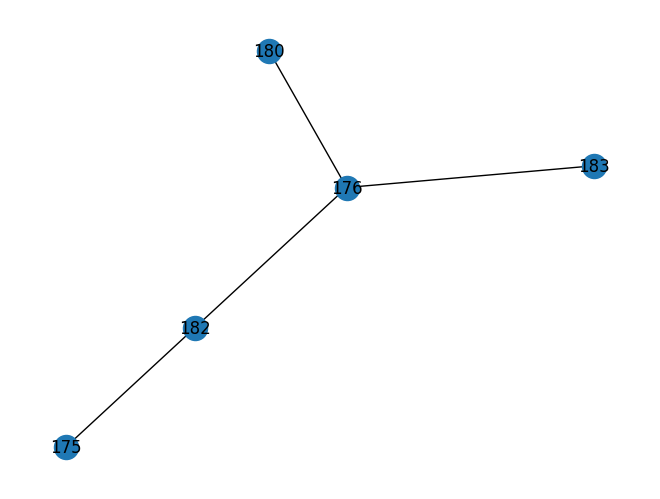

Performing node features query
Done with edge_df: 0.0014011859893798828
Performing Edge Query
After edge filter, # of rows = 1
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  180      6.40    5.328512               0.092817   
1  176  182     54.70   44.139437               0.768864   
2  176  183      8.95    4.869116               0.084815   
3  182  175     64.98   56.113901               0.355913   

   synapse_density_diff  n_synapses_diff definite_partner_sk_delete  \
0              0.000000                0                       None   
1              0.000243                1                       None   
2              0.000000                0                       None   
3              0.000243                1                       None   

  definite_partner_width_delete above_threshold_delete  
0                          None                   None  
1                          None   

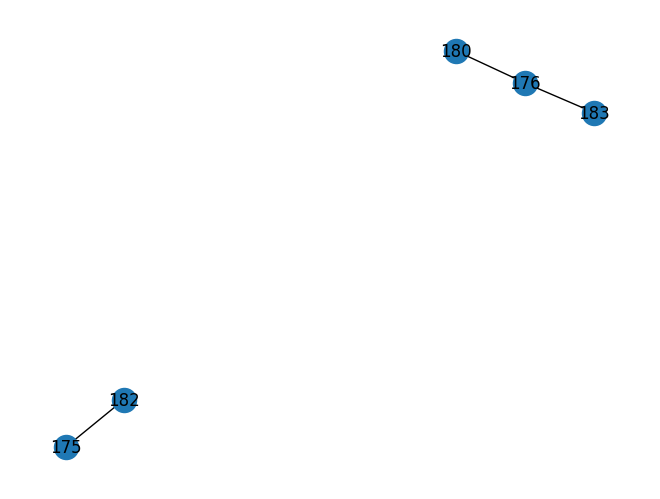

for upstream node 175, winning_node = 182, error_branches = [176 180 183]
Inside high_degree_false_positive_low_sibling_filter ****
Not exactly 2 downstream errors so returning
Current node skip distance was 1405.869259906308 but max skip distance was 1405.869259906308
Current node skip distance was 2300 but max skip distance was 2300.0
Current node skip distance was 1630.542249820406 but max skip distance was 1630.542249820406
branch_match_query = :
(((width_diff < 75) or (width_diff_percentage < 0.6)) and (sk_angle < 65))and ((synapse_density_diff<0.00015) or (n_synapses_diff < 6))
Done with edge_df: 0.0011258125305175781
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  182     54.70   44.139437               0.768864   
1  176  183      8.95    4.869116               0.084815   
2  176  179    165.29   53.921518               0.484339   
3  1

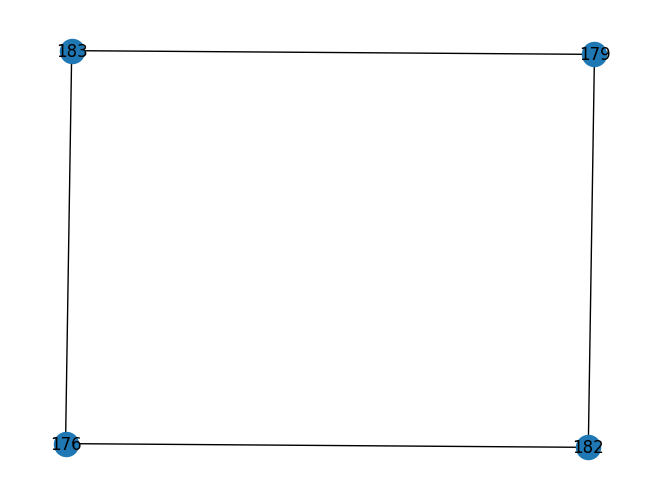

Performing global features query
Done with edge_df: 0.0017991065979003906
Performing Edge Query
After edge filter, # of rows = 2
Exporting the edges
Deleteing edges only

--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  182     54.70   44.139437               0.768864   
1  176  183      8.95    4.869116               0.084815   
2  182  179     57.59    9.782081               0.087866   
3  183  179     22.87   58.790633               0.528075   

   synapse_density_diff  n_synapses_diff  definite_partner_width_delete  \
0              0.000243                1                           True   
1              0.000000                0                          False   
2              0.000243                1                          False   
3              0.000000                0                           True   

  definite_partner_sk_delete  
0                       None  
1                       None  
2                       None  


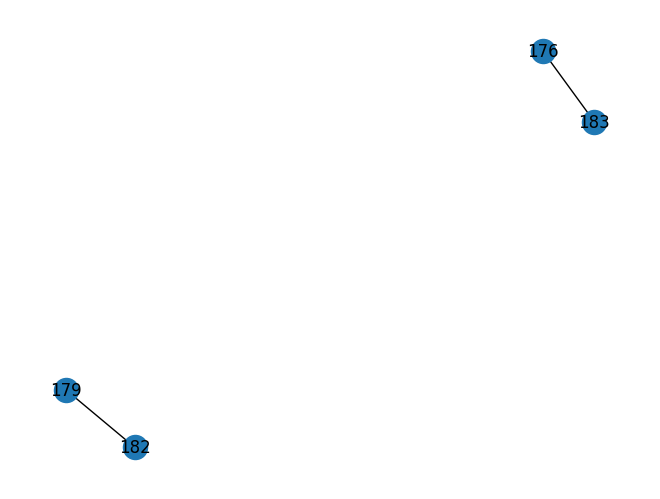

Performing node features query
Done with edge_df: 0.0007333755493164062
Performing Edge Query
After edge filter, # of rows = 0
Exporting the edges
Deleteing edges only

--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  183      8.95    4.869116               0.084815   
1  182  179     57.59    9.782081               0.087866   

   synapse_density_diff  n_synapses_diff  definite_partner_width_delete  \
0              0.000000                0                          False   
1              0.000243                1                          False   

  definite_partner_sk_delete above_threshold_delete  
0                       None                   None  
1                       None                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  176  183      8.95    4.869116               0.084815   
1  182  179     57.59    9.782081               0.087866   

   synapse_density_diff  n_synapses_d

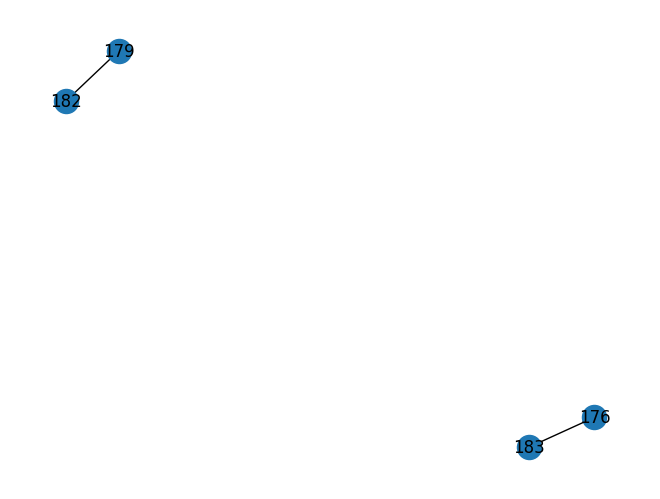

for upstream node 179, winning_node = 182, error_branches = [176 183]
Inside high_degree_false_positive_low_sibling_filter ****
Upstream width (101.54805929174576) less than width_min(250)
Current node skip distance was 1428.0713915563856 but max skip distance was 1428.0713915563856
Current node skip distance was 2097.6734145198216 but max skip distance was 2278.831235493137
Current node skip distance was 1589.7835803822736 but max skip distance was 1589.7835803822736
Current node skip distance was 1385.5812786224171 but max skip distance was 1385.5812786224171
Current node skip distance was 2196.868224156252 but max skip distance was 2196.868224156252
Current node skip distance was 1907.1869472675617 but max skip distance was 1907.1869472675617
limb_branch_dict_to_cancel = {'L3': array([105, 115, 102, 104, 145, 178, 147, 177, 150, 153, 156, 157, 152,
       173, 168, 167, 179, 182, 184, 185, 187, 189, 186, 188,  96,  65,
        64,  67,  71,  74,  77,  85,  88, 154, 155, 158, 161, 16

In [42]:
neuron_obj_proof = npu.auto_proof_stage(
    neuron_obj_axon,
    mesh_decimated = mesh_decimated,
    calculate_after_proof_stats = False,
)

In [43]:
_ = npu.after_auto_proof_stats(
    neuron_obj_proof,
    store_in_obj = True,
)


Working on compartment basal---
Compartment limb stats = {'n_limbs': 4, 'soma_angle_max': 125.98, 'soma_angle_min': 90.34}

Working on compartment apical_total---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 32.01, 'soma_angle_min': 32.01}

Working on compartment axon---
Compartment limb stats = {'n_limbs': 1, 'soma_angle_max': 156.14, 'soma_angle_min': 156.14}

Working on compartment dendrite---
Compartment limb stats = {'n_limbs': 5, 'soma_angle_max': 125.98, 'soma_angle_min': 32.01}


# Saving off the autoproofread neuron

In [44]:
vdi.save_neuron_obj_auto_proof(
    neuron_obj_proof,
)

Total time for soma meshes compression = 0.9486825466156006
Total time for insignificant_limbs,inside_pieces,non_soma_touching_meshes,not_processed_soma_containing_meshes compression = 0.3600931167602539
Total time for limb_meshes compression = 1.4643287658691406
    Starting Limb Correspondence Compression
Total time for new_limb_correspondence compression = 7.683753967285156
Cleared mesh: <trimesh.Trimesh(vertices.shape=(15723, 3), faces.shape=(38825, 3))>:139648191752464
Cleared mesh: <trimesh.Trimesh(vertices.shape=(4348, 3), faces.shape=(8941, 3))>:139649174742304
Cleared mesh: <trimesh.Trimesh(vertices.shape=(1586, 3), faces.shape=(3510, 3))>:139648191752800
Cleared mesh: <trimesh.Trimesh(vertices.shape=(808, 3), faces.shape=(1812, 3))>:139648191753856
Cleared mesh: <trimesh.Trimesh(vertices.shape=(806, 3), faces.shape=(1809, 3))>:139648041033680
Cleared mesh: <trimesh.Trimesh(vertices.shape=(805, 3), faces.shape=(1808, 3))>:139648041031328
Cleared mesh: <trimesh.Trimesh(vertices

'864691134917511946_auto_proof.pbz2'

# Plotting the final neuron

In [45]:
from neurd import synapse_utils as syu

In [46]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    neuron_obj_axon.mesh,
    meshes = [neuron_obj_proof.mesh],
    meshes_colors="red"
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

In [ ]:
syu.plot_synapses(neuron_obj_proof)

In [ ]:
syu.plot_synapses_error_from_neuron_obj(neuron_obj_proof)    

In [ ]:
syu.plot_synapses_valid_from_neuron_obj(neuron_obj_proof)  

In [ ]:
nviz.plot_compartments(neuron_obj_proof)

In [ ]:
%load_ext autoreload
%autoreload 2